In [32]:
# Jupyter notebook in Jupytext format

## SVR Hyperparameter Benchmarking Visualization Analysis

In [33]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path)
print(f"Project path set to: {os.getcwd()}")

Project path set to: c:\Github\ode-biomarker-project


In [34]:
from PathLoader import PathLoader #noqa: E402

path_loader = PathLoader("data_config.env", "current_user.env")

In [35]:
from DataLink import DataLink #noqa: E402

data_link = DataLink(path_loader, "data_codes.csv")

In [36]:
folder_name = "ThesisResult5-ModelSelectionBenchmark"
exp_id = "v1_svr_hyperparameter_mrmr_d3"

# Create both the main folder and exp_id subfolder
main_folder = f"{path_loader.get_data_path()}data/results/{folder_name}"
exp_folder = f"{main_folder}/{exp_id}"

if not os.path.exists(main_folder):
    os.makedirs(main_folder)
if not os.path.exists(exp_folder):
    os.makedirs(exp_folder)

file_save_path = f"{exp_folder}/"

In [37]:
# Load saved SVR hyperparameter benchmark data
import pandas as pd
import time

# Create a new report file for capturing print statements
print_report_path = f"{file_save_path}svr_hyperparameter_visualisation_report_{exp_id}.md"
print_report_file = open(print_report_path, 'w', encoding='utf-8')

# Write header to the print report
print_report_file.write(f"# SVR Hyperparameter Visualization Analysis Report - {exp_id}\n\n")
print_report_file.write(f"**Generated**: {time.strftime('%Y-%m-%d %H:%M:%S')}\n\n")
print_report_file.write("This report captures all print statements from the SVR hyperparameter analysis with proper formatting.\n\n")

def save_and_print(message, report_file=None, level="info"):
    """
    Print message to console and save to report file with proper formatting.
    
    Args:
        message: The message to print and save
        report_file: File object to save to (optional)
        level: Formatting level - "header", "section", "subsection", or "info"
    """
    # Print to console
    print(message)
    
    # Save to report with proper formatting
    if report_file:
        if level == "header":
            report_file.write(f"# {message}\n\n")
        elif level == "section":
            report_file.write(f"## {message}\n\n")
        elif level == "subsection":
            report_file.write(f"### {message}\n\n")
        else:  # info level
            report_file.write(f"{message}\n\n")
    
    return message

# Load the SVR hyperparameter benchmark data
pkl_path = f"{path_loader.get_data_path()}data/results/{folder_name}/svr_hyperparameter_benchmark_{exp_id}.pkl"
if not os.path.exists(pkl_path):
    raise FileNotFoundError(f"SVR hyperparameter benchmark pickle not found: {pkl_path}")

df_benchmark = pd.read_pickle(pkl_path)
save_and_print(f"Loaded SVR hyperparameter benchmark with shape: {df_benchmark.shape}", print_report_file, level="section")

# Display first rows
try:
    from IPython.display import display
    display(df_benchmark.head())
except Exception:
    save_and_print(df_benchmark.head().to_string(), print_report_file, level="info")

Loaded SVR hyperparameter benchmark with shape: (480, 22)


,rng,condition,feature_importance,feature_importance_from,model_performance,metrics,selected_features,model_name,svr_config,selected_scores,...,y_true_index,feature_selection_time,model_training_time,prediction_time,k_value,svr_kernel,svr_C,svr_gamma,svr_degree,method
0,15795,SVR_linear_C0.1_gammadefault_degdefault_k100_m...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.456708,"{'r2': 0.45670771140359545, 'pearson_r': 0.685...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 0.1}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.975703,0.104384,0.004606,100,linear,0.1,gammadefault,3,mrmr
1,15795,SVR_linear_C1_gammadefault_degdefault_k100_mrm...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.453311,"{'r2': 0.45331113130476464, 'pearson_r': 0.680...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 1}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.940861,1.053556,0.004605,100,linear,1.0,gammadefault,3,mrmr
2,15795,SVR_linear_C10_gammadefault_degdefault_k100_mr...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.457202,"{'r2': 0.4572019068459121, 'pearson_r': 0.6828...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 10}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.967708,7.849683,0.004631,100,linear,10.0,gammadefault,3,mrmr
3,15795,SVR_rbf_C0.1_gammaScale_degdefault_k100_mrmr_n...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.355289,"{'r2': 0.3552887218059324, 'pearson_r': 0.6424...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale'}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",3.131830,0.041009,0.009542,100,rbf,0.1,gammaScale,3,mrmr
4,15795,SVR_rbf_C1_gammaScale_degdefault_k100_mrmr_net...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.488930,"{'r2': 0.488929710627791, 'pearson_r': 0.70863...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'rbf', 'C': 1, 'gamma': 'scale'}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.953362,0.048678,0.008983,100,rbf,1.0,gammaScale,3,mrmr


## SVR Data Structure Analysis

In [38]:
# Parse condition column to extract SVR hyperparameters correctly
def parse_svr_condition_column(df_benchmark):
    """Parse the condition column to extract SVR hyperparameters correctly"""
    
    save_and_print("## Parsing SVR Condition Column", print_report_file, level="section")
    save_and_print("Parsing condition column to extract SVR kernel, C, gamma, degree, k-value, and method", print_report_file, level="info")
    
    # Create new columns based on condition parsing
    parsed_data = []
    
    for idx, row in df_benchmark.iterrows():
        condition = row['condition']
        
        # Parse the SVR condition format: SVR_{kernel}_C{value}_{gamma}_{degree}_k{value}_{method}
        # Example: "SVR_linear_C1_gammaScale_deg3_k100_mrmr_network_d3"
        parts = condition.split('_')
        
        # Extract SVR hyperparameters
        if len(parts) >= 7:
            svr_kernel = parts[1]
            svr_C = float(parts[2].replace('C', ''))
            svr_gamma = parts[3]
            svr_degree = int(parts[4].replace('deg', '').replace('default', '3'))
            k_value = int(parts[5].replace('k', ''))
            method = '_'.join(parts[6:])
        else:
            # Fallback parsing for unexpected formats
            save_and_print(f"Warning: Unexpected condition format: {condition}", print_report_file, level="info")
            svr_kernel = 'unknown'
            svr_C = 1.0
            svr_gamma = 'scale'
            svr_degree = 3
            k_value = 100
            method = 'unknown'
        
        parsed_data.append({
            'condition': condition,
            'svr_kernel': svr_kernel,
            'svr_C': svr_C,
            'svr_gamma': svr_gamma,
            'svr_degree': svr_degree,
            'k_value': k_value,
            'method': method
        })
    
    # Create a DataFrame with parsed values
    parsed_df = pd.DataFrame(parsed_data)
    
    # Update the dataframe with parsed values
    df_benchmark['svr_kernel'] = parsed_df['svr_kernel']
    df_benchmark['svr_C'] = parsed_df['svr_C']
    df_benchmark['svr_gamma'] = parsed_df['svr_gamma']
    df_benchmark['svr_degree'] = parsed_df['svr_degree']
    df_benchmark['k_value'] = parsed_df['k_value']
    df_benchmark['method'] = parsed_df['method']
    
    save_and_print("Dataframe columns updated with correctly parsed SVR hyperparameters", print_report_file, level="info")
    
    # Show unique values after parsing
    save_and_print("### Unique SVR Hyperparameter Values After Parsing", print_report_file, level="subsection")
    save_and_print(f"Kernels: {df_benchmark['svr_kernel'].unique()}", print_report_file, level="info")
    save_and_print(f"C values: {sorted(df_benchmark['svr_C'].unique())}", print_report_file, level="info")
    save_and_print(f"Gamma values: {df_benchmark['svr_gamma'].unique()}", print_report_file, level="info")
    save_and_print(f"Degree values: {sorted(df_benchmark['svr_degree'].unique())}", print_report_file, level="info")
    save_and_print(f"K-values: {sorted(df_benchmark['k_value'].unique())}", print_report_file, level="info")
    save_and_print(f"Methods: {df_benchmark['method'].unique()}", print_report_file, level="info")
    
    return df_benchmark

# Apply the parsing fix
df_benchmark = parse_svr_condition_column(df_benchmark)

# Display first rows after parsing
try:
    display(df_benchmark.head())
except Exception:
    save_and_print(df_benchmark.head().to_string(), print_report_file, level="info")

## Parsing SVR Condition Column
Parsing condition column to extract SVR kernel, C, gamma, degree, k-value, and method
Dataframe columns updated with correctly parsed SVR hyperparameters
### Unique SVR Hyperparameter Values After Parsing
Kernels: ['linear' 'rbf' 'poly' 'sigmoid']
C values: [np.float64(0.1), np.float64(1.0), np.float64(10.0), np.float64(100.0)]
Gamma values: ['gammadefault' 'gammaScale' 'gamma0.1' 'gamma1']
Degree values: [np.int64(2), np.int64(3)]
K-values: [np.int64(100), np.int64(500)]
Methods: ['mrmr_network_d3']


,rng,condition,feature_importance,feature_importance_from,model_performance,metrics,selected_features,model_name,svr_config,selected_scores,...,y_true_index,feature_selection_time,model_training_time,prediction_time,k_value,svr_kernel,svr_C,svr_gamma,svr_degree,method
0,15795,SVR_linear_C0.1_gammadefault_degdefault_k100_m...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.456708,"{'r2': 0.45670771140359545, 'pearson_r': 0.685...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 0.1}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.975703,0.104384,0.004606,100,linear,0.1,gammadefault,3,mrmr_network_d3
1,15795,SVR_linear_C1_gammadefault_degdefault_k100_mrm...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.453311,"{'r2': 0.45331113130476464, 'pearson_r': 0.680...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 1}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.940861,1.053556,0.004605,100,linear,1.0,gammadefault,3,mrmr_network_d3
2,15795,SVR_linear_C10_gammadefault_degdefault_k100_mr...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.457202,"{'r2': 0.4572019068459121, 'pearson_r': 0.6828...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'linear', 'C': 10}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.967708,7.849683,0.004631,100,linear,10.0,gammadefault,3,mrmr_network_d3
3,15795,SVR_rbf_C0.1_gammaScale_degdefault_k100_mrmr_n...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.355289,"{'r2': 0.3552887218059324, 'pearson_r': 0.6424...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale'}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",3.131830,0.041009,0.009542,100,rbf,0.1,gammaScale,3,mrmr_network_d3
4,15795,SVR_rbf_C1_gammaScale_degdefault_k100_mrmr_net...,"([O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P180...",model,0.488930,"{'r2': 0.488929710627791, 'pearson_r': 0.70863...","[O60716;CTND1_HUMAN, P42771;CDN2A_HUMAN, P1803...",SVR,"{'kernel': 'rbf', 'C': 1, 'gamma': 'scale'}","[223.43343259944592, 7719.946185515369, 595.38...",...,"Index(['SIDM00879', 'SIDM00213', 'SIDM00542', ...",2.953362,0.048678,0.008983,100,rbf,1.0,gammaScale,3,mrmr_network_d3


In [39]:
# Dynamically detect available SVR configurations
kernels = df_benchmark['svr_kernel'].unique().tolist()
c_values = sorted(df_benchmark['svr_C'].unique())
gamma_values = df_benchmark['svr_gamma'].unique().tolist()
degree_values = sorted(df_benchmark['svr_degree'].unique())
k_values = sorted(df_benchmark['k_value'].unique())
methods = df_benchmark['method'].unique().tolist()

save_and_print("### SVR Configuration Summary", print_report_file, level="subsection")
save_and_print(f"Number of kernel types: {len(kernels)}", print_report_file, level="info")
save_and_print(f"Kernels: {kernels}", print_report_file, level="info")
save_and_print(f"C values: {c_values}", print_report_file, level="info")
save_and_print(f"Gamma values: {gamma_values}", print_report_file, level="info")
save_and_print(f"Degree values: {degree_values}", print_report_file, level="info")
save_and_print(f"K-values: {k_values}", print_report_file, level="info")
save_and_print(f"Methods: {methods}", print_report_file, level="info")
save_and_print(f"Total SVR configurations: {len(df_benchmark)}", print_report_file, level="info")

### SVR Configuration Summary
Number of kernel types: 4
Kernels: ['linear', 'rbf', 'poly', 'sigmoid']
C values: [np.float64(0.1), np.float64(1.0), np.float64(10.0), np.float64(100.0)]
Gamma values: ['gammadefault', 'gammaScale', 'gamma0.1', 'gamma1']
Degree values: [np.int64(2), np.int64(3)]
K-values: [np.int64(100), np.int64(500)]
Methods: ['mrmr_network_d3']
Total SVR configurations: 480


'Total SVR configurations: 480'

In [40]:

# Define publication-quality font sizes with optimized spacing and layout
publication_font_sizes = {
    'title': 16, 'axis_label': 14, 'tick': 12, 
    'value': 10, 'legend': 10, 'annotation': 9
}

# Create SVR configuration labels for better readability
kernel_labels = {
    'linear': 'Linear',
    'rbf': 'RBF',
    'poly': 'Polynomial',
    'sigmoid': 'Sigmoid'
}

# Create gamma labels
gamma_labels = {
    'scale': 'Scale',
    'auto': 'Auto',
    'gamma0.1': 'γ=0.1',
    'gamma1': 'γ=1'
}

# Create method labels
method_labels = {
    'mrmr_network_d3': 'MRMR+Network (d3)'
}

## SVR Hyperparameter Performance Comparison Visualizations

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Centralized color and marker mapping system for consistent visualization
def get_consistent_kernel_color_mapping(kernels):
    """Create consistent color mapping for kernel types across all plots"""
    # Standard color palette for kernel types
    kernel_colors = {
        'linear': '#1f77b4',  # Blue
        'rbf': '#ff7f0e',     # Orange
        'poly': '#2ca02c',    # Green
        'sigmoid': '#d62728'  # Red
    }
    
    extended_palette = sns.color_palette("husl", max(8, len(kernels)))
    
    color_mapping = {}
    for i, kernel in enumerate(kernels):
        if kernel in kernel_colors:
            color_mapping[kernel] = kernel_colors[kernel]
        else:
            color_mapping[kernel] = extended_palette[i % len(extended_palette)]
    
    return color_mapping

def get_consistent_kernel_marker_mapping(kernels):
    """Create consistent marker mapping for kernel types across all plots"""
    base_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'd']
    
    marker_mapping = {}
    for i, kernel in enumerate(kernels):
        marker_mapping[kernel] = base_markers[i % len(base_markers)]
    
    return marker_mapping

# Generate consistent color and marker mappings based on available kernels
kernel_color_mapping = get_consistent_kernel_color_mapping(kernels)
kernel_marker_mapping = get_consistent_kernel_marker_mapping(kernels)

# Create palette list for seaborn in the correct order
kernel_palette = [kernel_color_mapping[kernel] for kernel in kernels]

# Define consistent R² range for all performance plots
R2_RANGE = (-0.1, 0.5)

### Figure 1: SVR Kernel Type Performance Comparison (Box Plot)

C:\Users\l8105\AppData\Local\Temp\ipykernel_23392\2673550205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_benchmark, x='svr_kernel', y='model_performance',


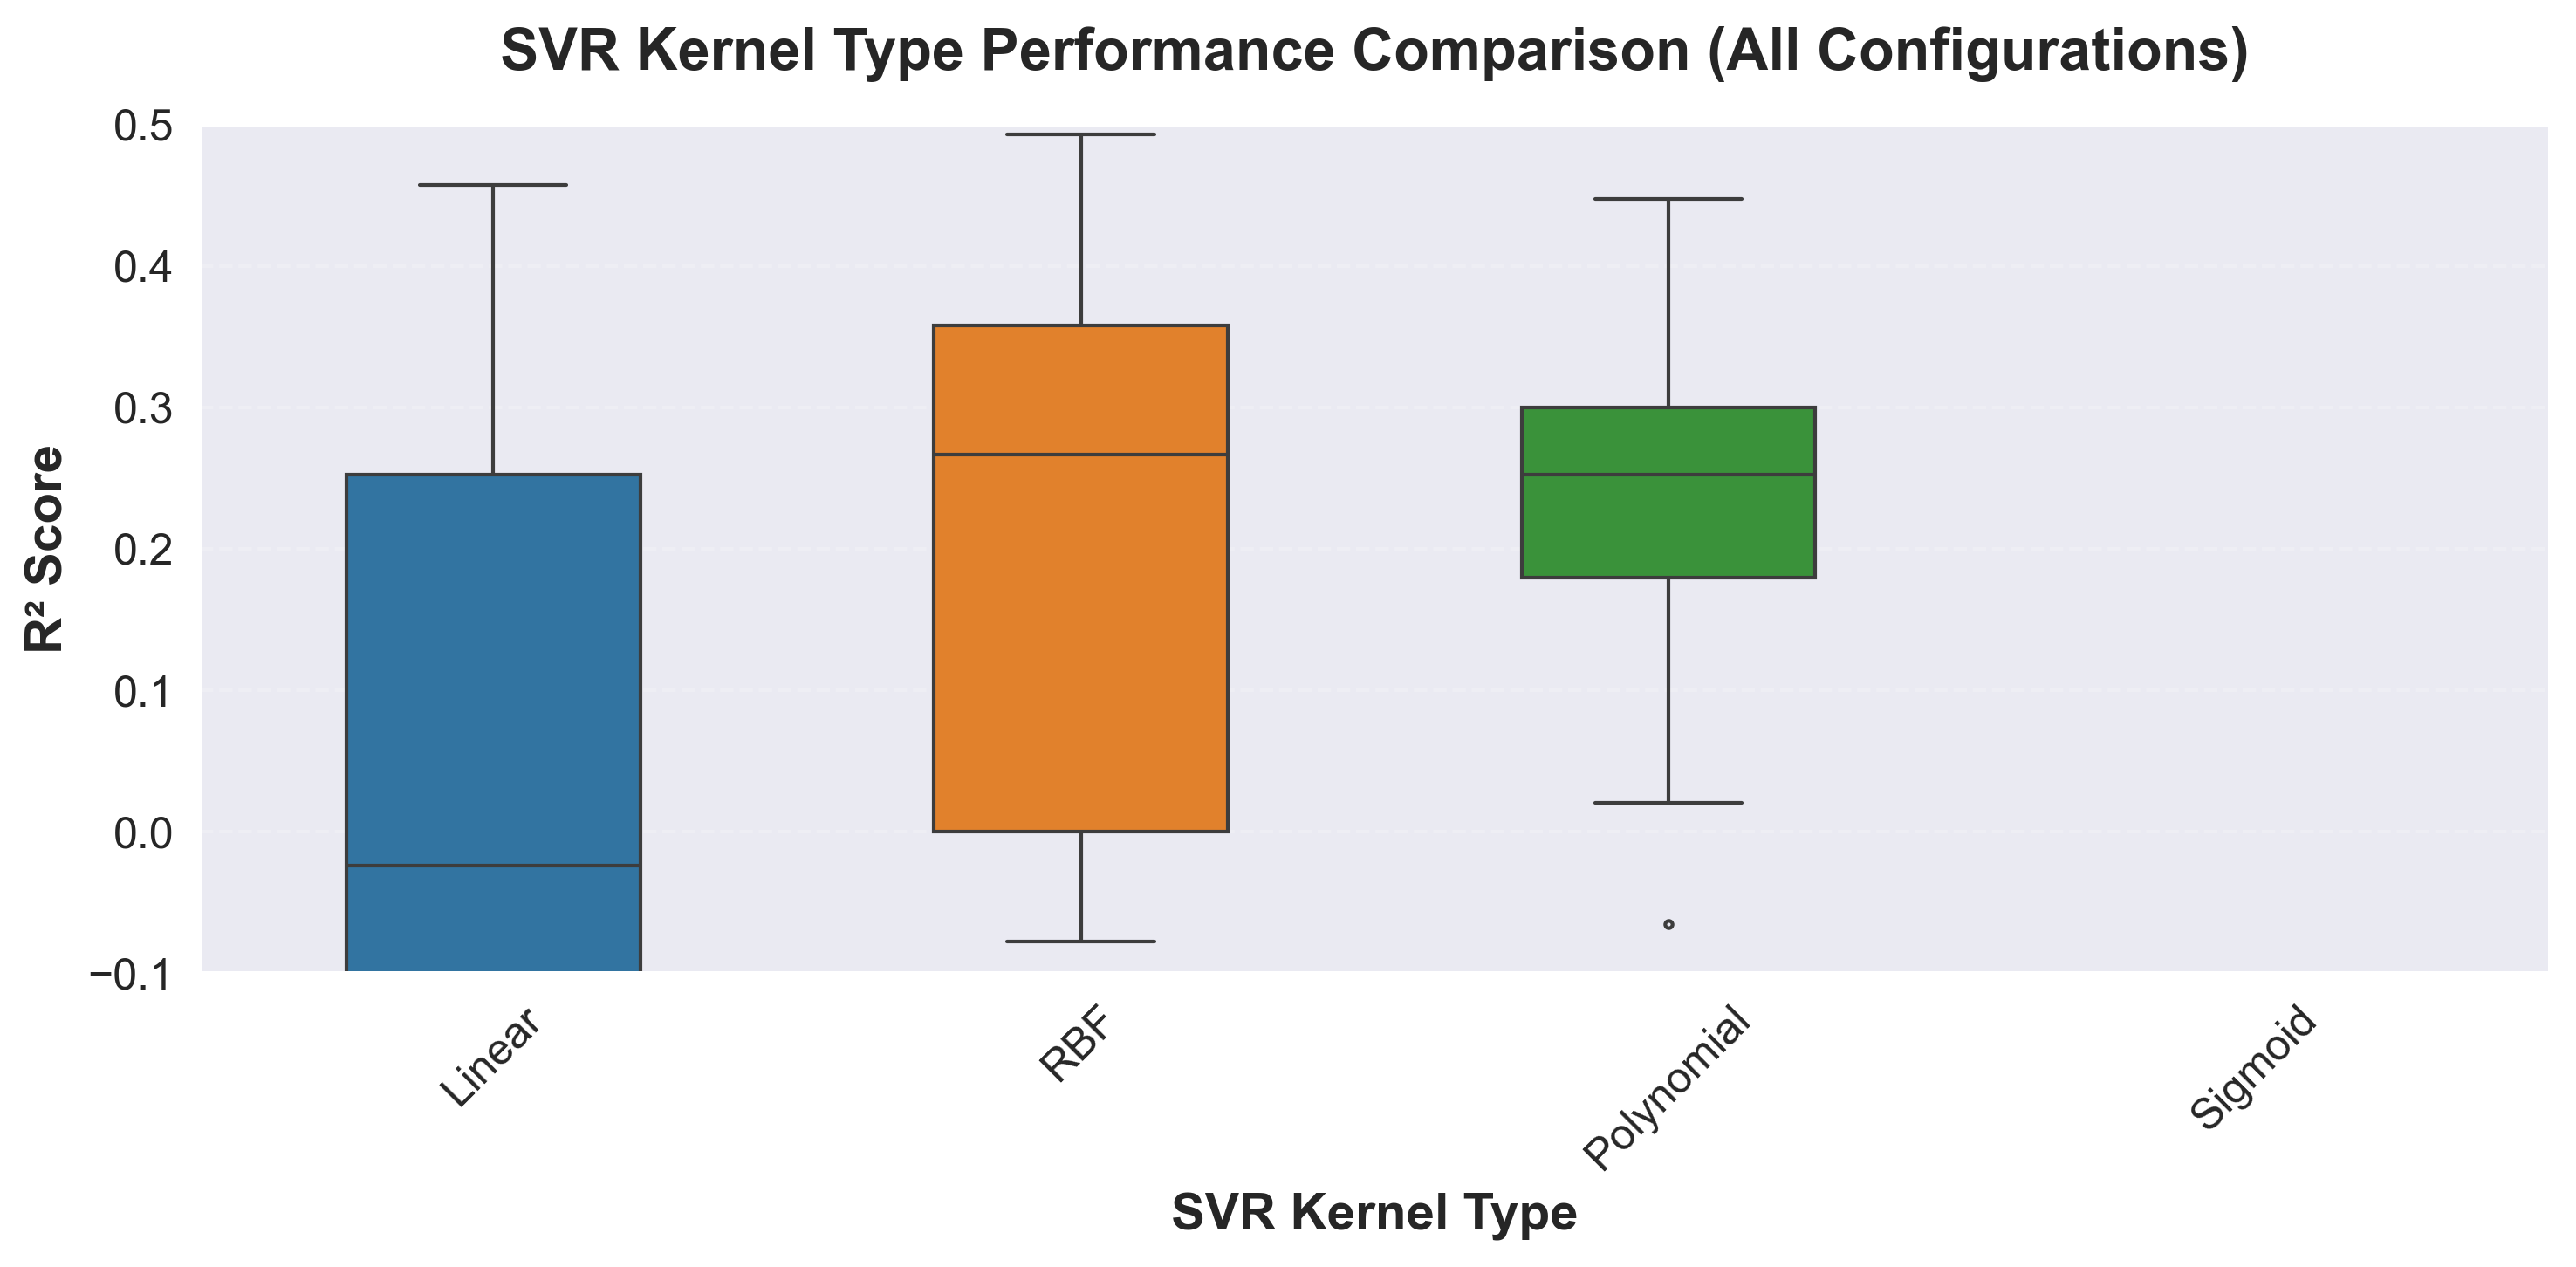

Created SVR kernel type comparison box plot


'Created SVR kernel type comparison box plot'

In [42]:
# Create publication-quality box plot comparing kernel types across all configurations
plt.figure(figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = publication_font_sizes['tick']
plt.rcParams['axes.linewidth'] = 1.2

sns.boxplot(data=df_benchmark, x='svr_kernel', y='model_performance', 
            order=kernels,
            palette=kernel_palette, width=0.5, fliersize=2)
plt.title('SVR Kernel Type Performance Comparison (All Configurations)', 
          fontsize=publication_font_sizes['title'], fontweight='bold', pad=15)
plt.xlabel('SVR Kernel Type', fontsize=publication_font_sizes['axis_label'], fontweight='bold')
plt.ylabel('R² Score', fontsize=publication_font_sizes['axis_label'], fontweight='bold')
plt.xticks(ticks=range(len(kernels)), 
           labels=[kernel_labels[k] for k in kernels],
           rotation=45, fontsize=publication_font_sizes['tick'])
plt.yticks(fontsize=publication_font_sizes['tick'])
plt.ylim(R2_RANGE)  # Set consistent R² range
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.savefig(f"{file_save_path}svr_kernel_comparison_boxplot_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created SVR kernel type comparison box plot", print_report_file, level="info")

### Figure 2: Mean Performance of SVR Kernel Types (Bar Plot)

C:\Users\l8105\AppData\Local\Temp\ipykernel_23392\483669885.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


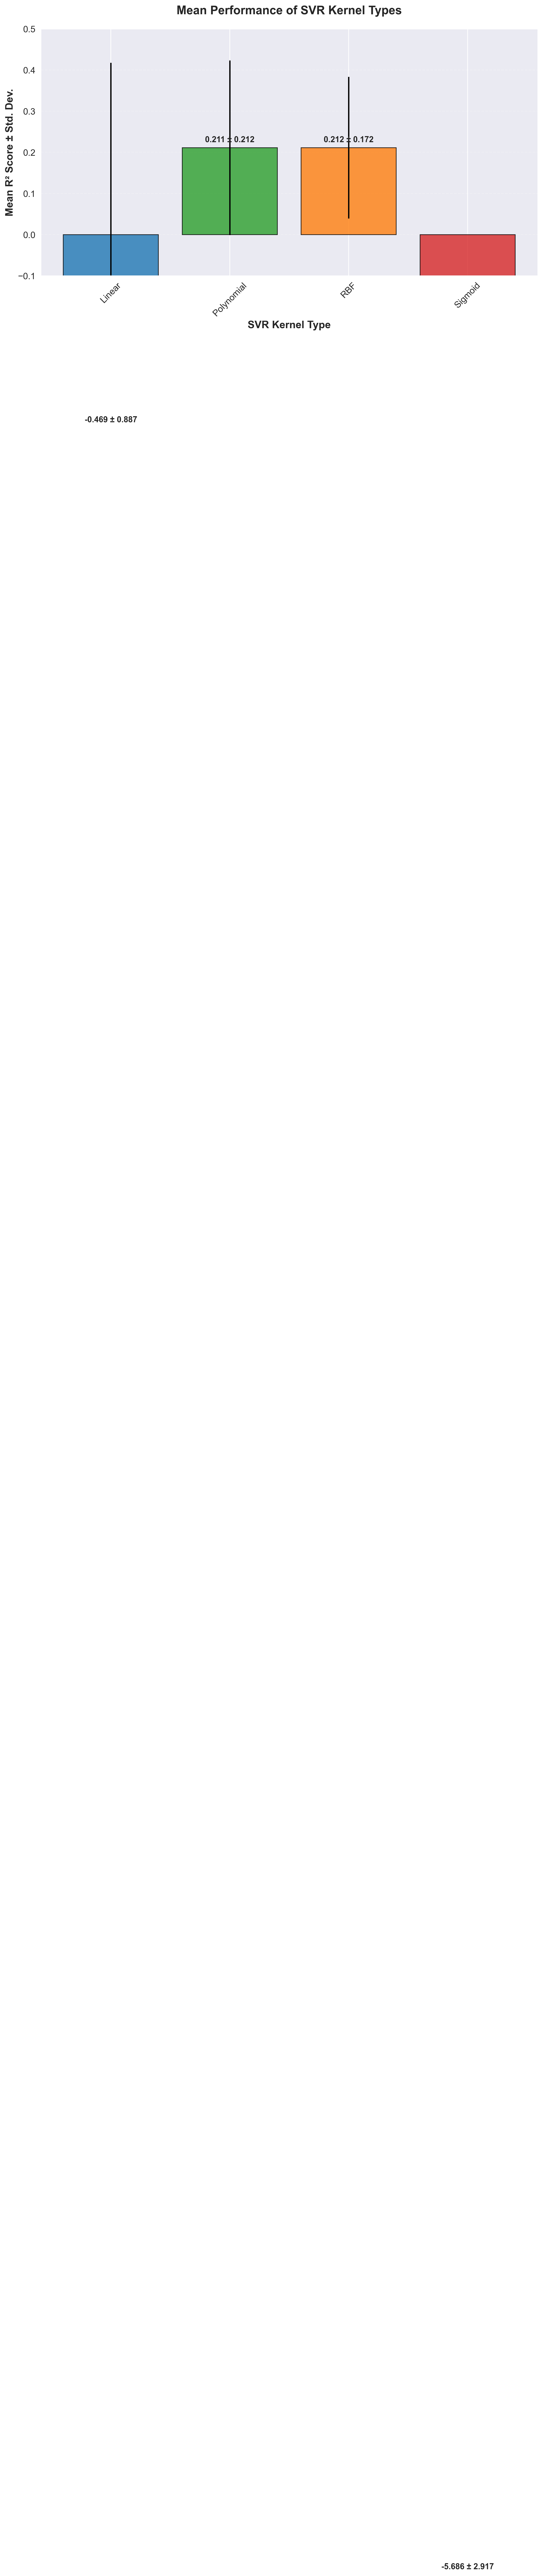

Created SVR kernel performance bar plot


'Created SVR kernel performance bar plot'

In [43]:
# Calculate mean and standard deviation for each kernel type
kernel_stats = df_benchmark.groupby('svr_kernel')['model_performance'].agg(['mean', 'std', 'count']).reset_index()

# Create publication-quality bar plot with error bars
plt.figure(figsize=(12, 6), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Use consistent colors for bar plot
bar_colors = [kernel_color_mapping[kernel] for kernel in kernel_stats['svr_kernel']]
bars = plt.bar(range(len(kernel_stats)), kernel_stats['mean'], 
               yerr=kernel_stats['std'], capsize=8, alpha=0.8,
               color=bar_colors, edgecolor='black', linewidth=1)

plt.title('Mean Performance of SVR Kernel Types', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SVR Kernel Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score ± Std. Dev.', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(len(kernel_stats)), 
           labels=[kernel_labels[k] for k in kernel_stats['svr_kernel']],
           rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(R2_RANGE)  # Set consistent R² range

# Add value labels on bars with improved formatting
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f} ± {kernel_stats.iloc[i]["std"]:.3f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.savefig(f"{file_save_path}svr_kernel_performance_bar_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created SVR kernel performance bar plot", print_report_file, level="info")

In [44]:
# Create comprehensive statistical summary for kernel types
kernel_summary_table = df_benchmark.groupby('svr_kernel')['model_performance'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('25%', lambda x: x.quantile(0.25)),
    ('median', 'median'),
    ('75%', lambda x: x.quantile(0.75)),
    ('max', 'max')
]).round(4)

save_and_print("Performance Statistics by SVR Kernel Type:", print_report_file, level="section")
save_and_print(kernel_summary_table.to_string(), print_report_file, level="info")

Performance Statistics by SVR Kernel Type:
            count    mean     std      min     25%  median     75%     max
svr_kernel                                                                
linear        120 -0.4691  0.8872  -3.2391 -1.1490 -0.0237  0.2521  0.4572
poly           80  0.2114  0.2122  -1.3165  0.1796  0.2525  0.2997  0.4475
rbf           240  0.2116  0.1719  -0.0777 -0.0000  0.2668  0.3581  0.4927
sigmoid        40 -5.6856  2.9174 -12.2500 -7.0533 -5.4600 -3.0205 -1.8424


'            count    mean     std      min     25%  median     75%     max\nsvr_kernel                                                                \nlinear        120 -0.4691  0.8872  -3.2391 -1.1490 -0.0237  0.2521  0.4572\npoly           80  0.2114  0.2122  -1.3165  0.1796  0.2525  0.2997  0.4475\nrbf           240  0.2116  0.1719  -0.0777 -0.0000  0.2668  0.3581  0.4927\nsigmoid        40 -5.6856  2.9174 -12.2500 -7.0533 -5.4600 -3.0205 -1.8424'

### Figure 3: C Parameter Sensitivity Analysis (Line Plot)

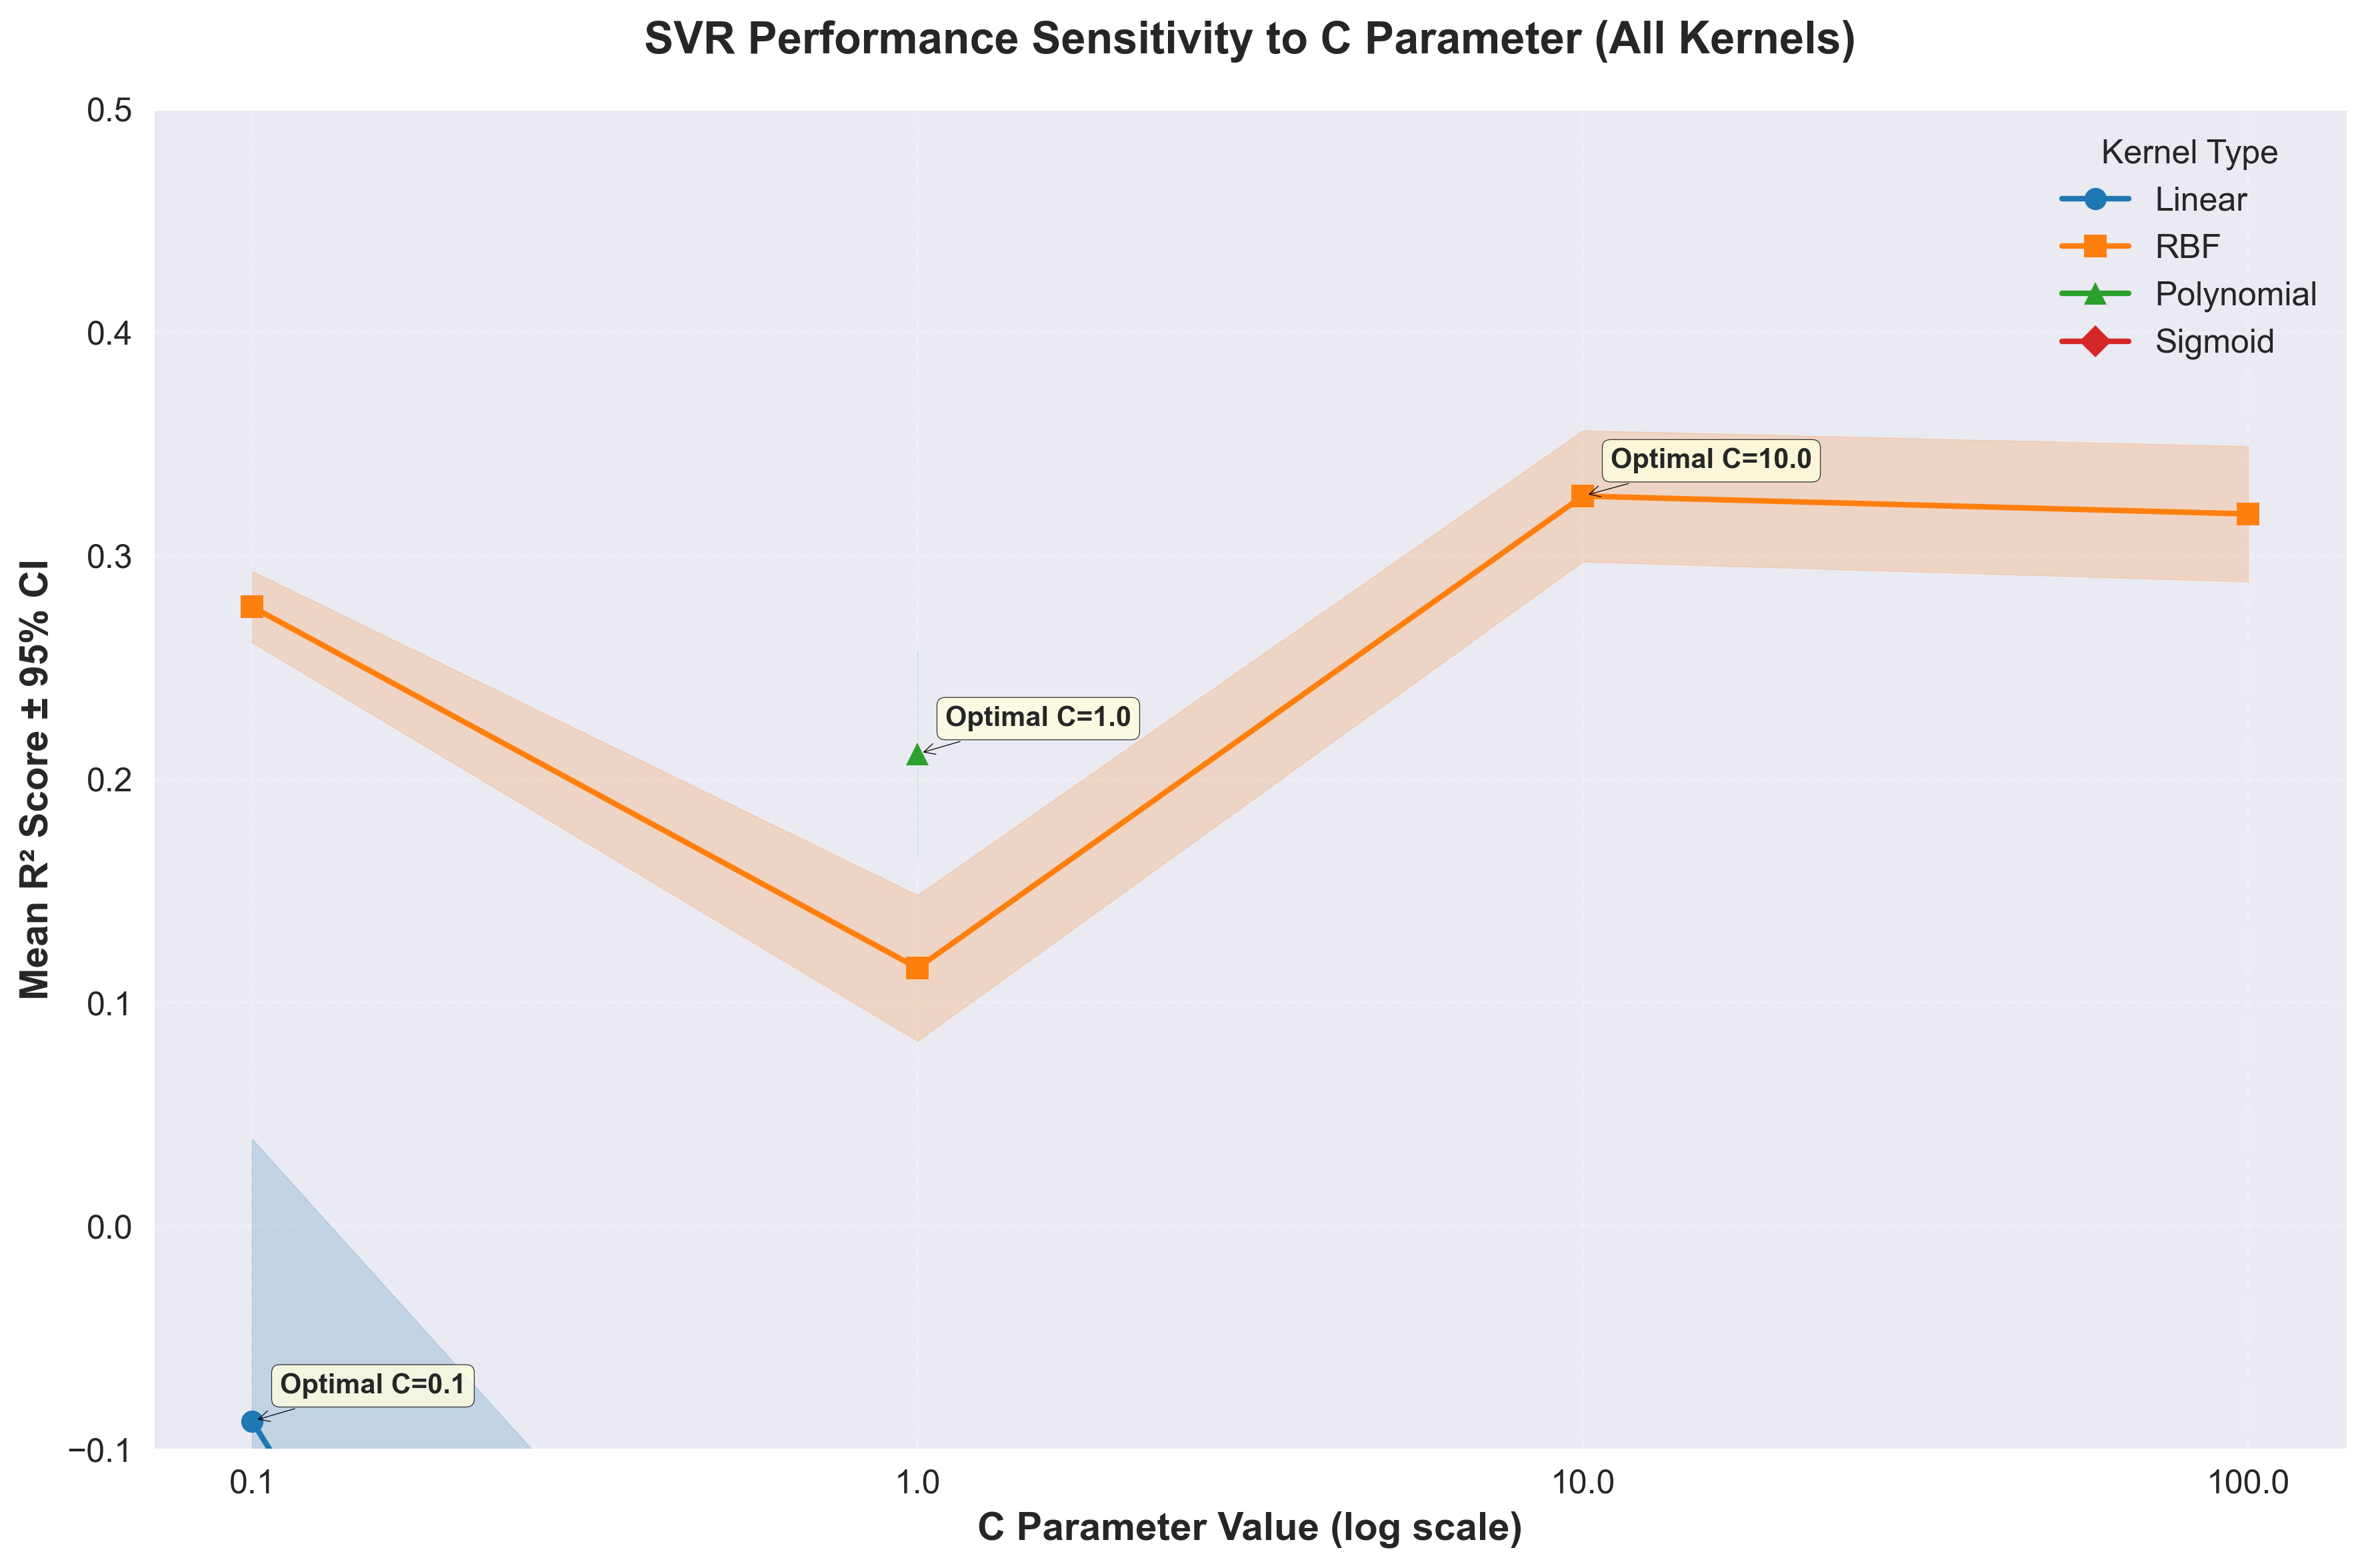

Created C parameter sensitivity line plot


'Created C parameter sensitivity line plot'

In [45]:
# Calculate mean performance for each kernel at each C value
c_performance_stats = df_benchmark.groupby(['svr_kernel', 'svr_C'])['model_performance'].agg(['mean', 'std', 'count']).reset_index()

# Calculate 95% confidence intervals (assuming normal distribution)
c_performance_stats['ci_lower'] = c_performance_stats['mean'] - 1.96 * c_performance_stats['std'] / np.sqrt(c_performance_stats['count'])
c_performance_stats['ci_upper'] = c_performance_stats['mean'] + 1.96 * c_performance_stats['std'] / np.sqrt(c_performance_stats['count'])

# Create C parameter sensitivity line plot
plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Plot each kernel's sensitivity to C parameter
for kernel in kernels:
    kernel_data = c_performance_stats[c_performance_stats['svr_kernel'] == kernel]
    
    if len(kernel_data) > 0:
        # Sort by C value for proper line plotting
        kernel_data = kernel_data.sort_values('svr_C')
        
        # Plot line with error bars (95% CI)
        plt.plot(kernel_data['svr_C'], kernel_data['mean'], 
                marker=kernel_marker_mapping[kernel], 
                color=kernel_color_mapping[kernel],
                linewidth=2, markersize=8, label=kernel_labels[kernel])
        
        # Add confidence interval shading
        plt.fill_between(kernel_data['svr_C'], 
                        kernel_data['ci_lower'], kernel_data['ci_upper'],
                        color=kernel_color_mapping[kernel], alpha=0.2)

plt.title('SVR Performance Sensitivity to C Parameter (All Kernels)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('C Parameter Value (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score ± 95% CI', fontsize=14, fontweight='bold')
plt.xscale('log')  # Log scale for C parameter
plt.xticks(c_values, [str(c) for c in c_values], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(R2_RANGE)  # Set consistent R² range
plt.legend(title='Kernel Type', fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.2, linestyle='--')

# Add annotations for optimal C values per kernel
for kernel in kernels:
    kernel_data = c_performance_stats[c_performance_stats['svr_kernel'] == kernel]
    if len(kernel_data) > 0:
        best_c_idx = kernel_data['mean'].idxmax()
        best_c = kernel_data.loc[best_c_idx, 'svr_C']
        best_perf = kernel_data.loc[best_c_idx, 'mean']
        
        plt.annotate(f'Optimal C={best_c}', 
                    xy=(best_c, best_perf), 
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.savefig(f"{file_save_path}svr_c_parameter_sensitivity_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created C parameter sensitivity line plot", print_report_file, level="info")

### Figure 4: RBF Kernel Gamma vs C Parameter (Heatmap)

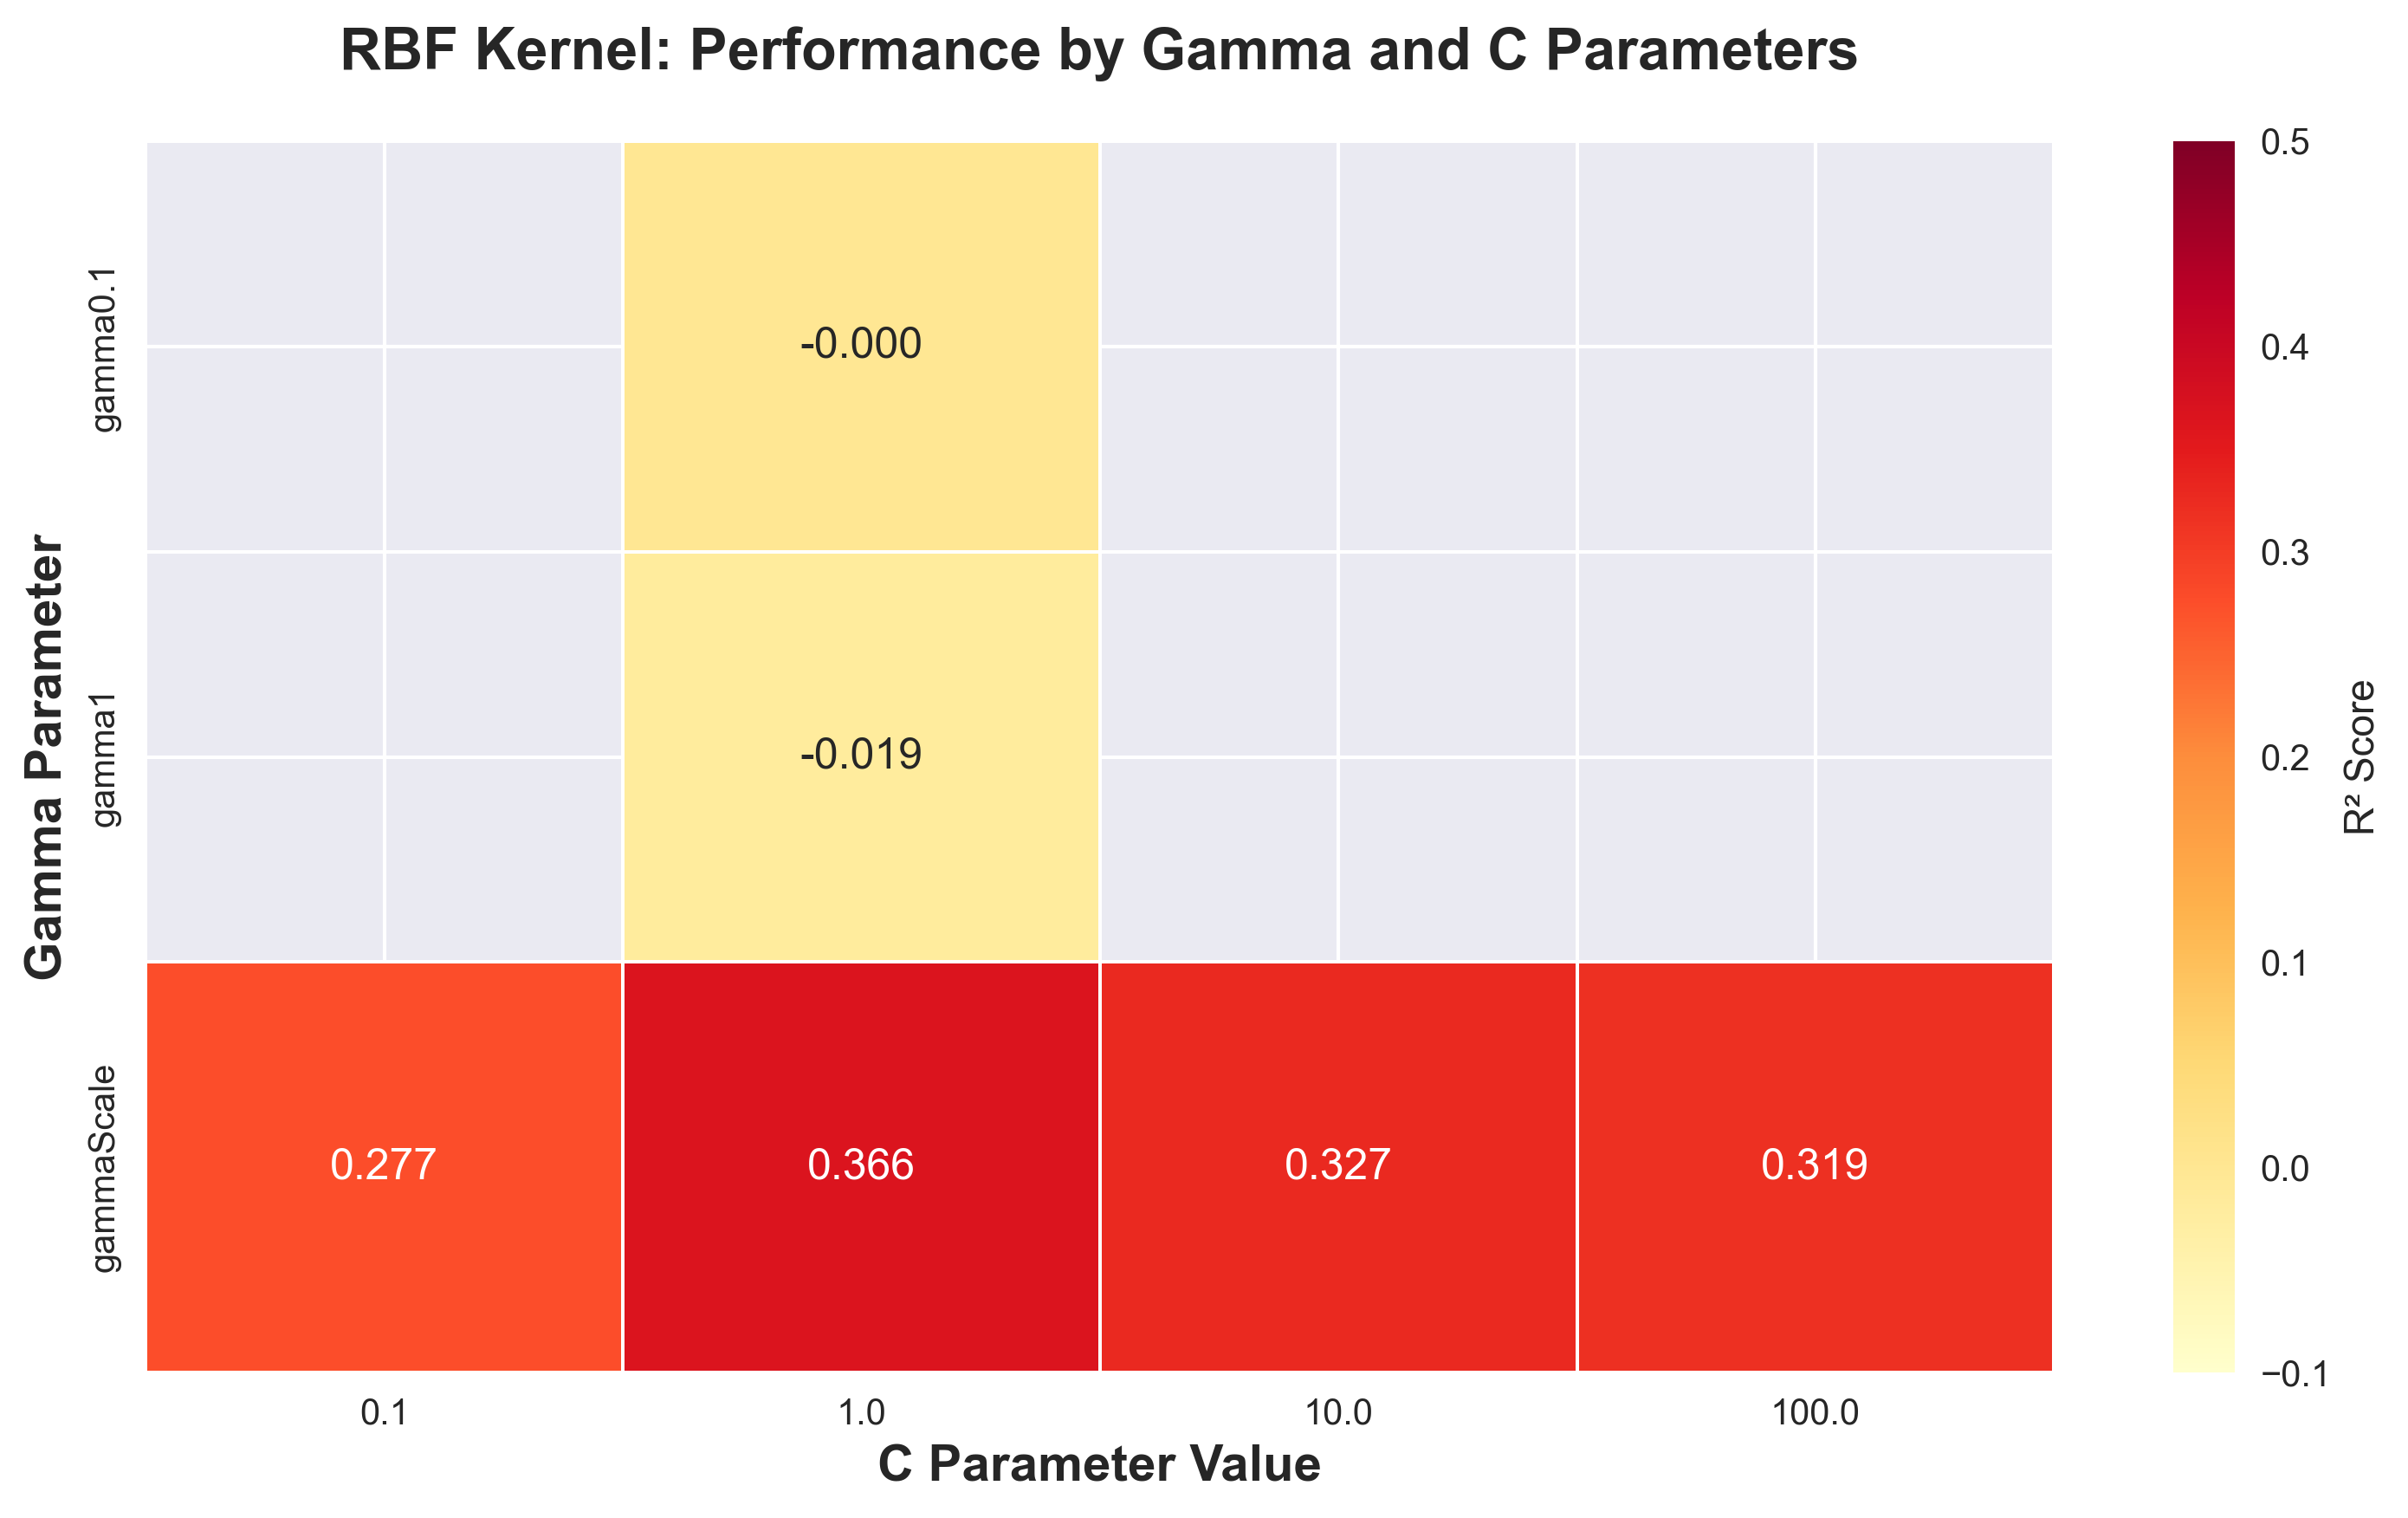

Created gamma vs C parameter heatmap for RBF kernel


In [46]:
# Filter data for RBF kernel (where gamma is most relevant)
rbf_data = df_benchmark[df_benchmark['svr_kernel'] == 'rbf']

if len(rbf_data) > 0:
    # Calculate gamma performance statistics
    gamma_performance_stats = rbf_data.groupby(['svr_gamma', 'svr_C'])['model_performance'].agg(['mean', 'std', 'count']).reset_index()
    
    # Create heatmap for gamma vs C performance
    plt.figure(figsize=(10, 6), dpi=300)
    plt.rcParams['font.family'] = 'sans'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.linewidth'] = 1.2
    
    # Pivot data for heatmap
    heatmap_data = gamma_performance_stats.pivot(index='svr_gamma', columns='svr_C', values='mean')
    
    # Create heatmap with proper R² scaling
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd', 
                vmin=R2_RANGE[0], vmax=R2_RANGE[1],  # Set consistent R² range
                cbar_kws={'label': 'R² Score'}, linewidths=0.5)
    
    plt.title('RBF Kernel: Performance by Gamma and C Parameters', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('C Parameter Value', fontsize=14, fontweight='bold')
    plt.ylabel('Gamma Parameter', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"{file_save_path}svr_gamma_c_heatmap_{exp_id}.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    save_and_print("Created gamma vs C parameter heatmap for RBF kernel", print_report_file, level="info")

### Figure 5: Feature Set Size Impact (k=100 vs k=500)

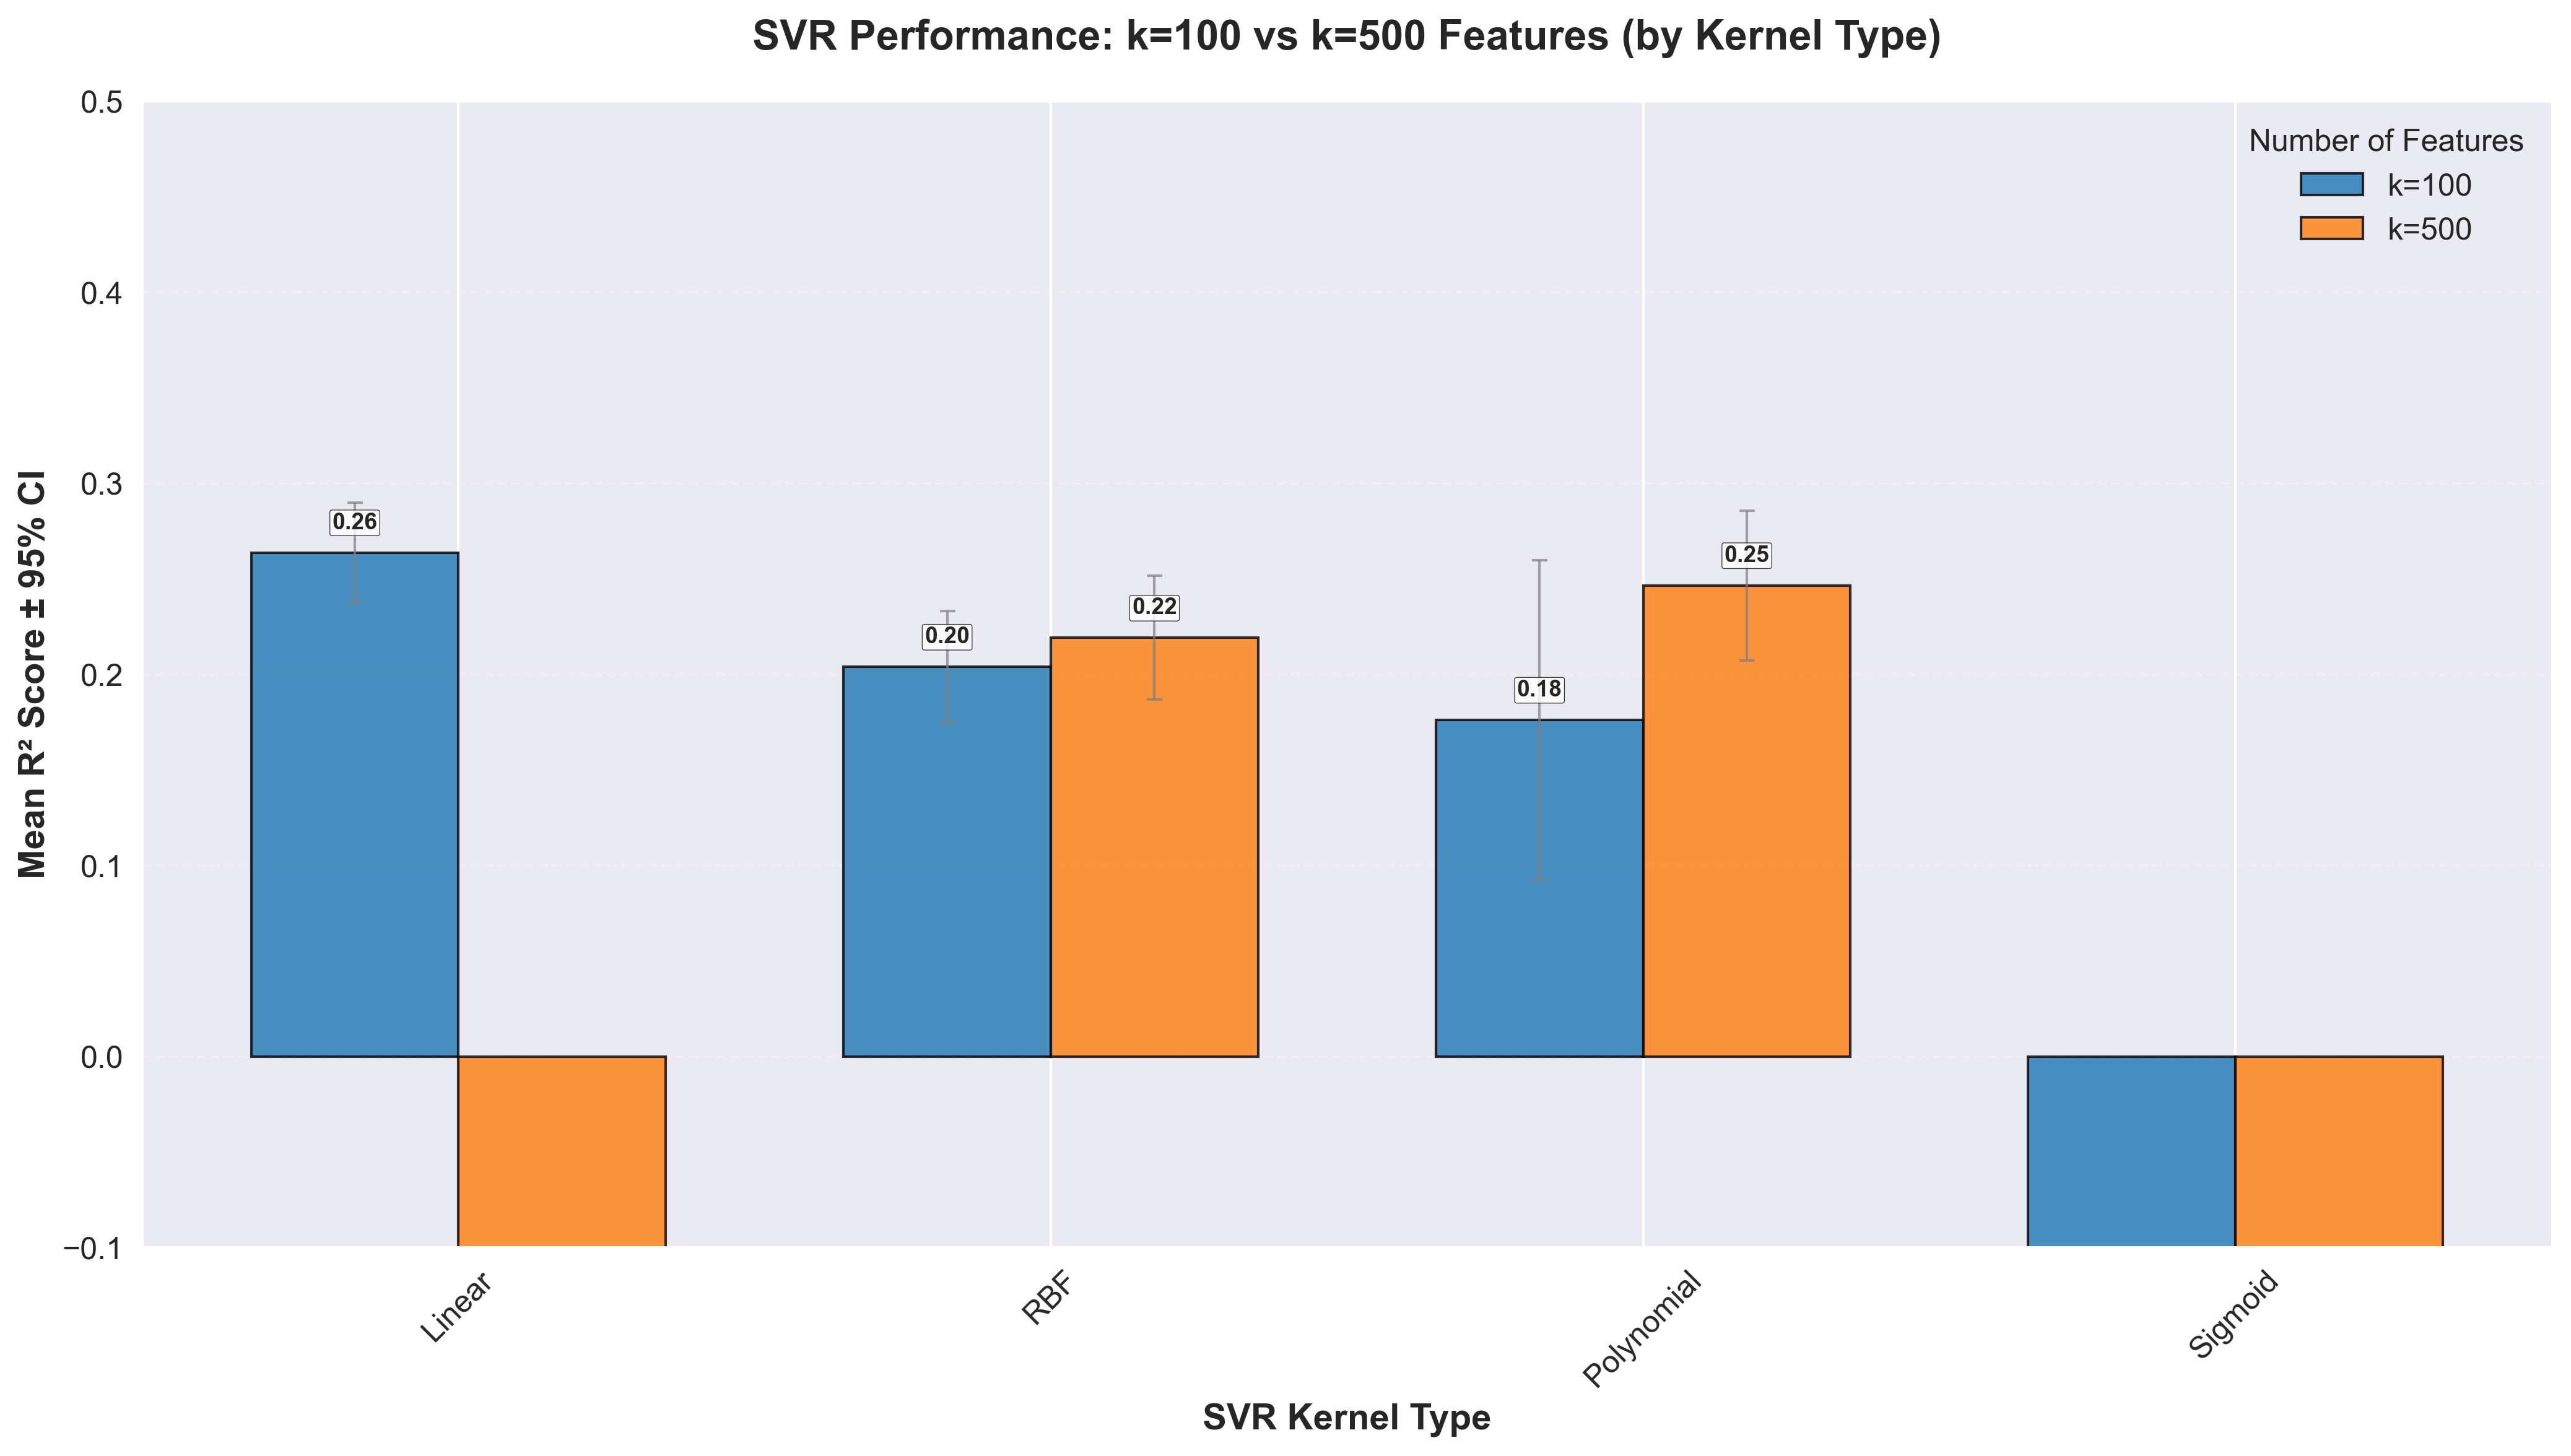

Created feature set size impact comparison


'Created feature set size impact comparison'

In [47]:
# Calculate performance statistics for each kernel at each k-value
k_performance_stats = df_benchmark.groupby(['svr_kernel', 'k_value'])['model_performance'].agg(['mean', 'std', 'count']).reset_index()

# Calculate 95% confidence intervals
k_performance_stats['ci_lower'] = k_performance_stats['mean'] - 1.96 * k_performance_stats['std'] / np.sqrt(k_performance_stats['count'])
k_performance_stats['ci_upper'] = k_performance_stats['mean'] + 1.96 * k_performance_stats['std'] / np.sqrt(k_performance_stats['count'])

# Create grouped bar chart for k-value comparison
plt.figure(figsize=(14, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

bar_width = 0.35
x_pos = np.arange(len(kernels))

# Create bars for k=100 and k=500 with consistent colors
for i, k_value in enumerate(k_values):
    k_data = k_performance_stats[k_performance_stats['k_value'] == k_value]
    
    # Ensure the data is in the same order as kernels
    k_means = []
    k_cis = []
    for kernel in kernels:
        kernel_k_data = k_data[k_data['svr_kernel'] == kernel]
        if len(kernel_k_data) > 0:
            k_means.append(kernel_k_data['mean'].iloc[0])
            k_cis.append((kernel_k_data['mean'].iloc[0] - kernel_k_data['ci_lower'].iloc[0], 
                         kernel_k_data['ci_upper'].iloc[0] - kernel_k_data['mean'].iloc[0]))
        else:
            k_means.append(0)
            k_cis.append((0, 0))
    
    # Use consistent colors: blue for k=100, orange for k=500
    color = '#1f77b4' if k_value == 100 else '#ff7f0e'
    bars = plt.bar(x_pos + i * bar_width, k_means, bar_width,
                   color=color, alpha=0.8, edgecolor='black', linewidth=1,
                   label=f'k={k_value}')
    
    # Add 95% confidence intervals with subtle styling
    plt.errorbar(x_pos + i * bar_width, k_means, 
                 yerr=np.array(k_cis).T, fmt='none', ecolor='gray', 
                 elinewidth=1, capsize=3, capthick=1, alpha=0.7)

plt.title('SVR Performance: k=100 vs k=500 Features (by Kernel Type)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SVR Kernel Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score ± 95% CI', fontsize=14, fontweight='bold')
plt.xticks(x_pos + bar_width/2, [kernel_labels[k] for k in kernels], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(R2_RANGE)  # Set consistent R² range
plt.legend(title='Number of Features', fontsize=12, framealpha=0.9)
plt.grid(axis='y', alpha=0.2, linestyle='--')

# Add value labels with improved placement (only for positive values)
for i, kernel in enumerate(kernels):
    for j, k_value in enumerate(k_values):
        k_data = k_performance_stats[k_performance_stats['k_value'] == k_value]
        kernel_k_data = k_data[k_data['svr_kernel'] == kernel]
        if len(kernel_k_data) > 0:
            height = kernel_k_data['mean'].iloc[0]
            if height >= 0:  # Only label positive values to reduce clutter
                plt.text(x_pos[i] + j * bar_width, height + 0.01,
                         f'{height:.2f}', ha='center', va='bottom', 
                         fontsize=9, fontweight='bold',
                         bbox=dict(boxstyle="round,pad=0.1", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig(f"{file_save_path}svr_k_value_comparison_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created feature set size impact comparison", print_report_file, level="info")

### Figure 6: Small Multiples for Individual Kernel Analysis

### ENHANCED VERSION 6: Advanced Heatmap Matrix Visualization


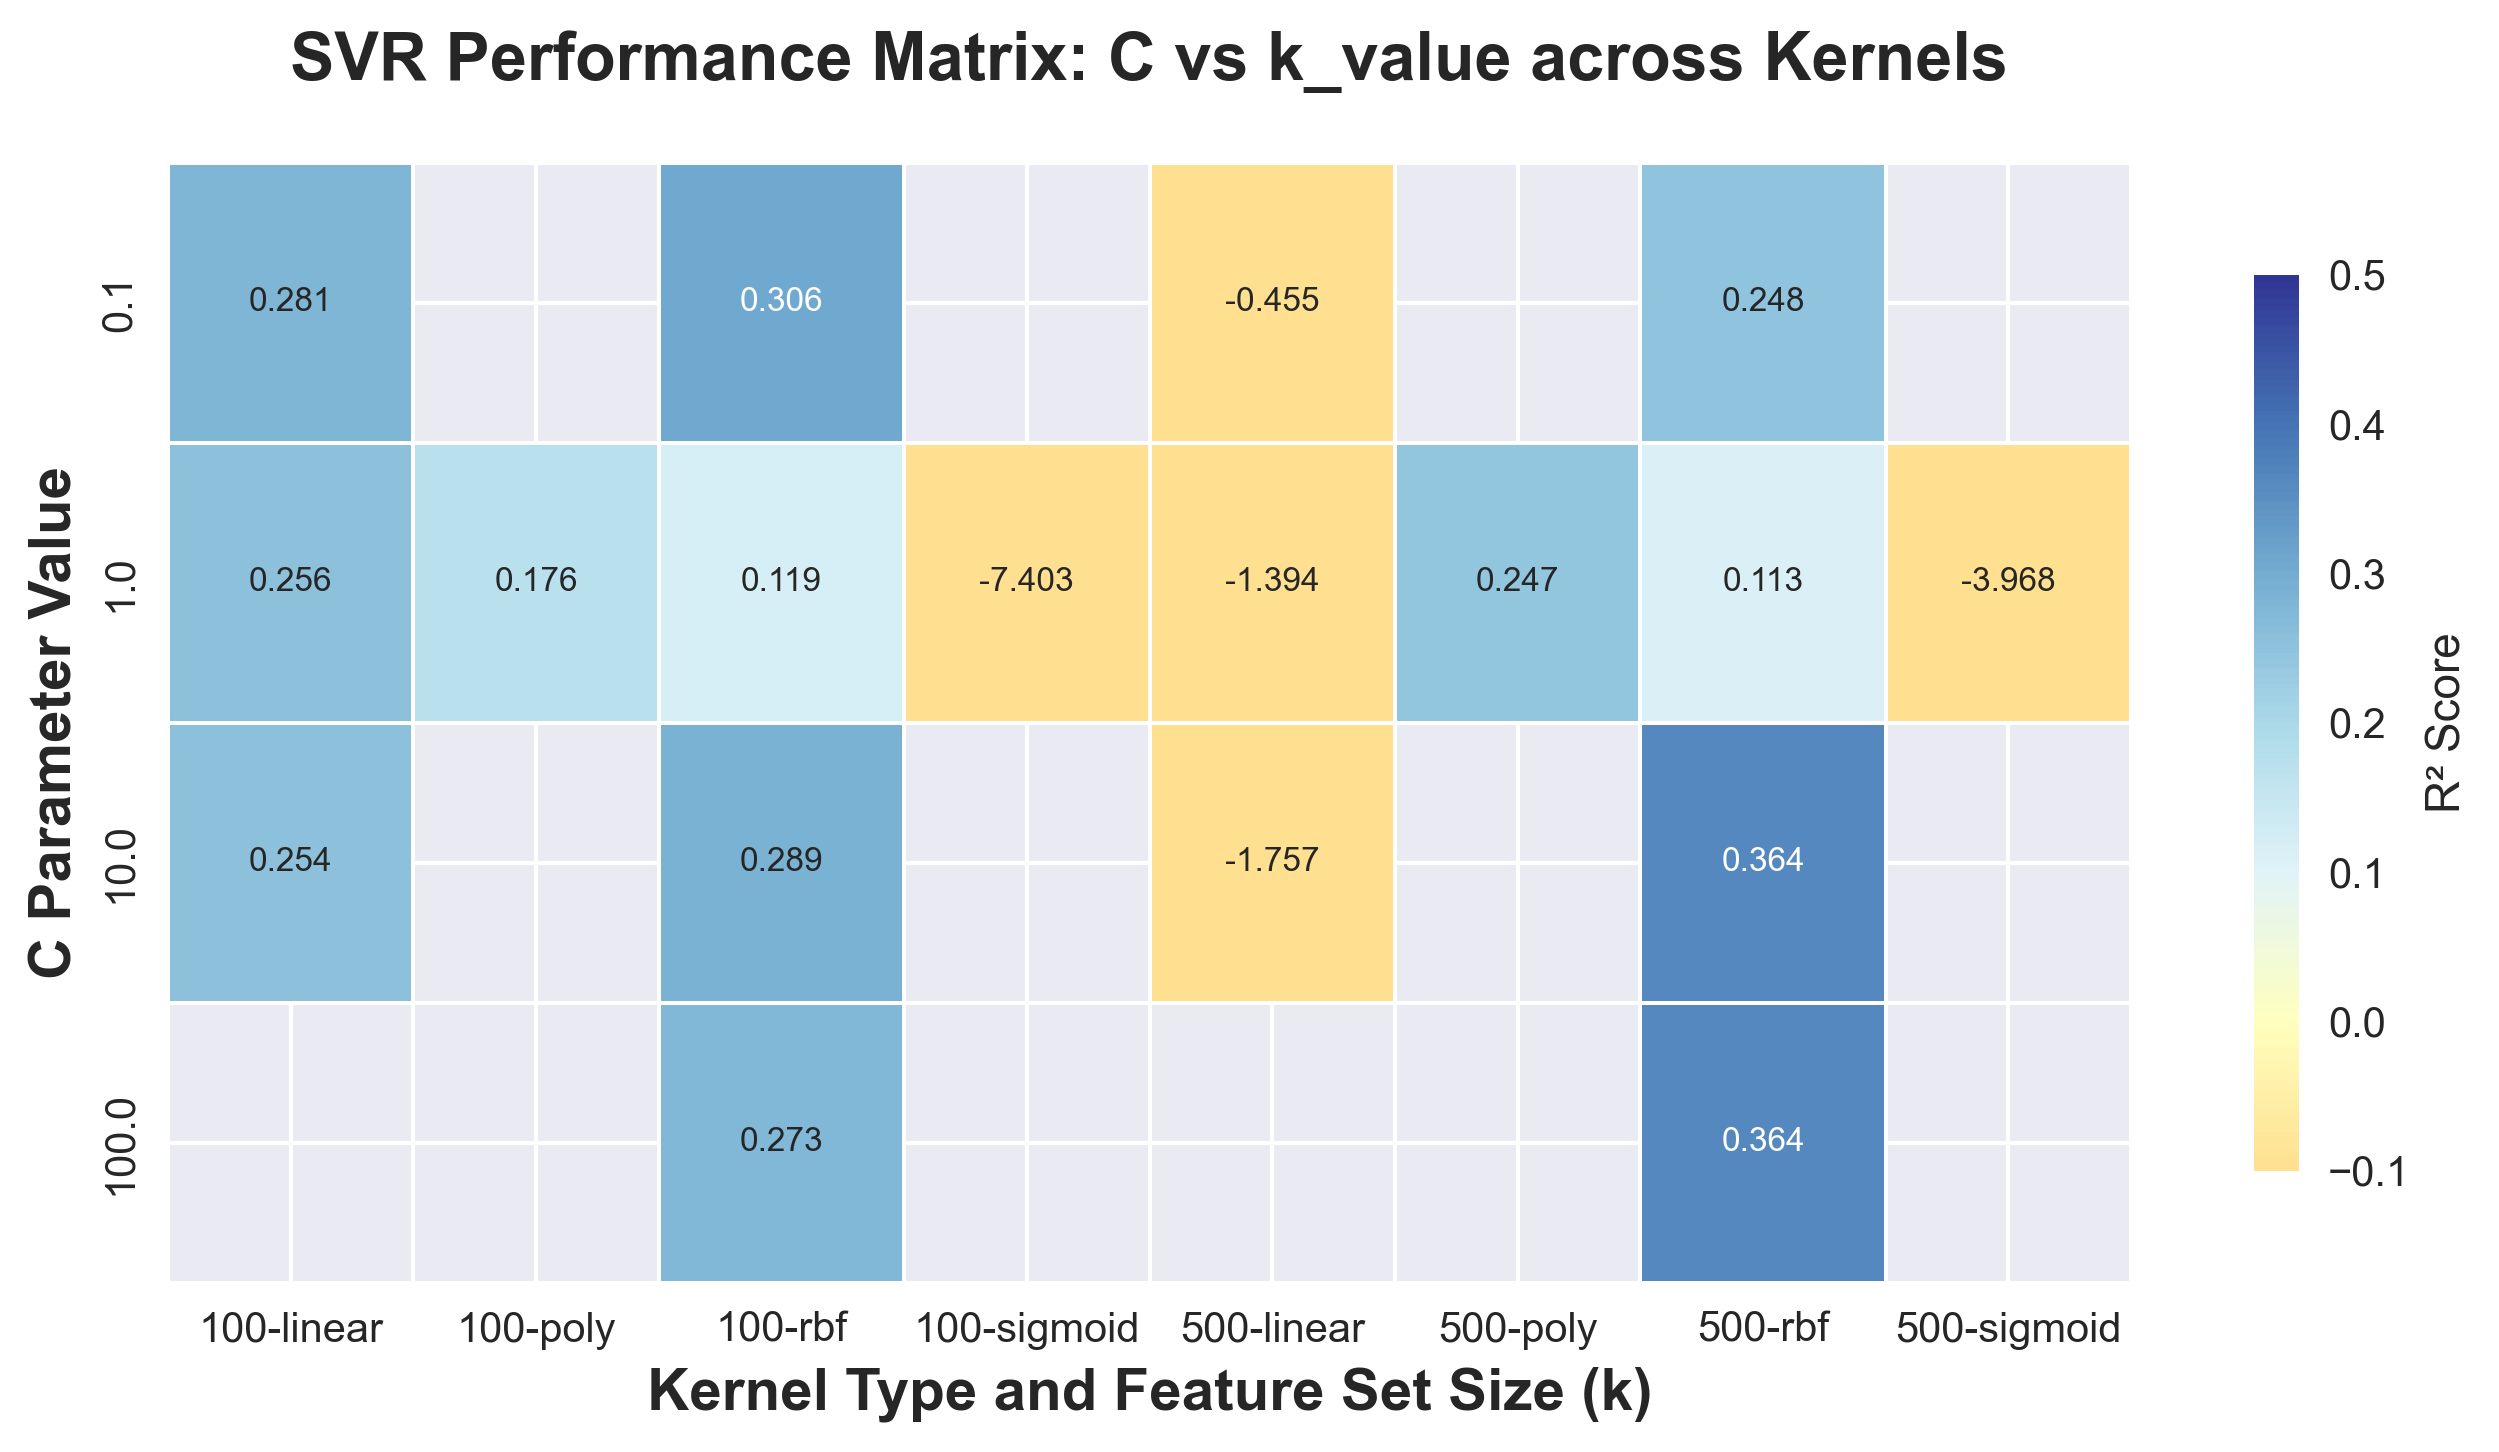

Created advanced heatmap matrix visualization


'Created advanced heatmap matrix visualization'

In [58]:
# ENHANCED VERSION 6: Advanced Heatmap Matrix Visualization
save_and_print("### ENHANCED VERSION 6: Advanced Heatmap Matrix Visualization", print_report_file, level="subsection")

# Create heatmap for C vs k_value across all kernels
plt.figure(figsize=(9, 5), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Calculate mean performance for each combination
heatmap_data = df_benchmark.pivot_table(index='svr_C', 
                                       columns=['k_value', 'svr_kernel'], 
                                       values='model_performance', 
                                       aggfunc='mean')

# Create the heatmap with proper R² color scaling
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="RdYlBu", 
            center=0, vmin=-0.1, vmax=0.5,  # Proper R² scaling
            cbar_kws={'label': 'R² Score', 'shrink': 0.8},
            linewidths=0.5, annot_kws={'size': 8})

plt.title('SVR Performance Matrix: C vs k_value across Kernels', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kernel Type and Feature Set Size (k)', fontsize=14, fontweight='bold')
plt.ylabel('C Parameter Value', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{file_save_path}svr_heatmap_matrix_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created advanced heatmap matrix visualization", print_report_file, level="info")

## SVR Timing and Efficiency Analysis

In [49]:
# Analyze computational time metrics for SVR configurations
save_and_print("## SVR Computational Time Analysis", print_report_file, level="section")

# Calculate time statistics for each kernel type
time_stats = df_benchmark.groupby('svr_kernel')[['feature_selection_time', 'model_training_time', 'prediction_time']].agg(['mean', 'std', 'count']).round(6)

save_and_print("Time Statistics by SVR Kernel Type:", print_report_file, level="subsection")
save_and_print(time_stats.to_string(), print_report_file, level="info")

## SVR Computational Time Analysis
Time Statistics by SVR Kernel Type:
           feature_selection_time                 model_training_time                   prediction_time                
                             mean       std count                mean         std count            mean       std count
svr_kernel                                                                                                             
linear                  10.779151  8.129374   120           94.862150  199.103466   120        0.009449  0.004953   120
poly                    10.690310  8.075628    80            0.084614    0.035442    80        0.009812  0.005157    80
rbf                     10.744127  8.076979   240            0.097987    0.037973   240        0.021486  0.011580   240
sigmoid                 10.794146  8.181915    40            0.095886    0.038755    40        0.011609  0.004834    40


'           feature_selection_time                 model_training_time                   prediction_time                \n                             mean       std count                mean         std count            mean       std count\nsvr_kernel                                                                                                             \nlinear                  10.779151  8.129374   120           94.862150  199.103466   120        0.009449  0.004953   120\npoly                    10.690310  8.075628    80            0.084614    0.035442    80        0.009812  0.005157    80\nrbf                     10.744127  8.076979   240            0.097987    0.037973   240        0.021486  0.011580   240\nsigmoid                 10.794146  8.181915    40            0.095886    0.038755    40        0.011609  0.004834    40'

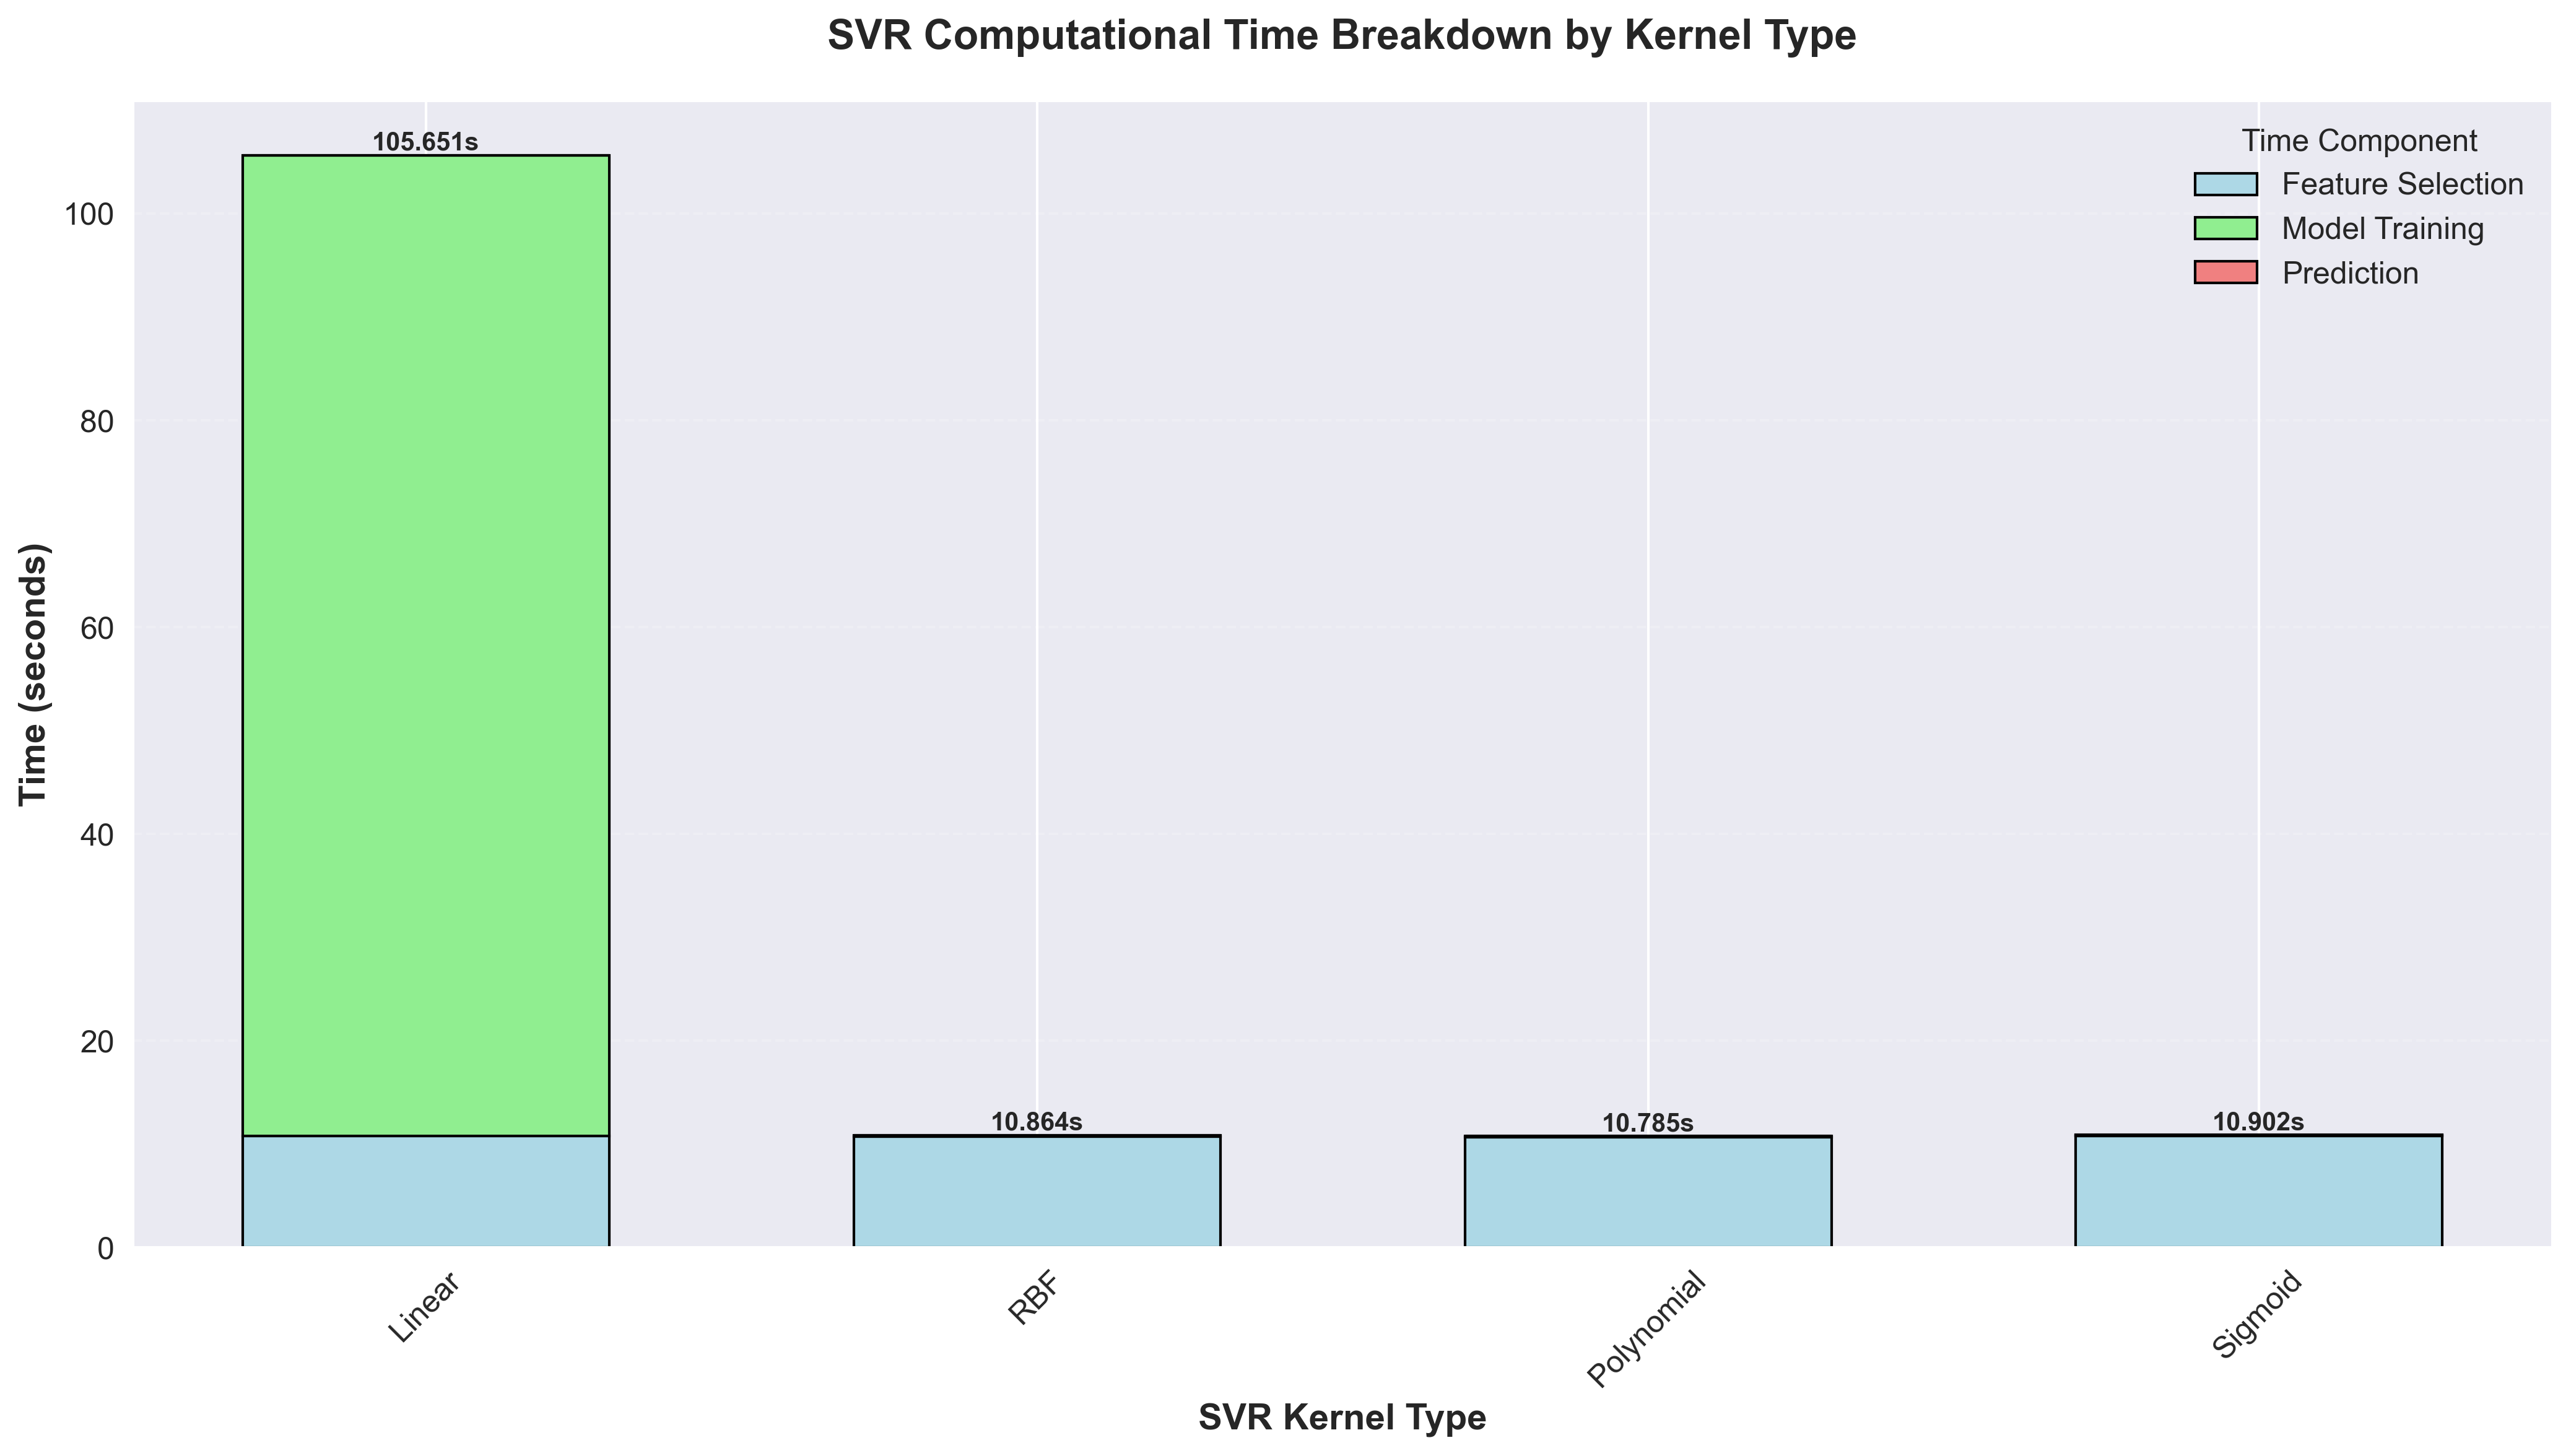

Created SVR computational time breakdown visualization


'Created SVR computational time breakdown visualization'

In [50]:
# Create time comparison visualization for SVR kernels
plt.figure(figsize=(14, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Calculate mean times for each kernel
time_means = df_benchmark.groupby('svr_kernel')[['feature_selection_time', 'model_training_time', 'prediction_time']].mean()

# Create stacked bar plot for time components
bar_width = 0.6
x_pos = np.arange(len(kernels))

# Plot each time component
feature_selection_times = [time_means.loc[kernel, 'feature_selection_time'] for kernel in kernels]
training_times = [time_means.loc[kernel, 'model_training_time'] for kernel in kernels]
prediction_times = [time_means.loc[kernel, 'prediction_time'] for kernel in kernels]

# Create stacked bars
plt.bar(x_pos, feature_selection_times, bar_width, label='Feature Selection', 
        color='lightblue', edgecolor='black', linewidth=1)
plt.bar(x_pos, training_times, bar_width, bottom=feature_selection_times, 
        label='Model Training', color='lightgreen', edgecolor='black', linewidth=1)
plt.bar(x_pos, prediction_times, bar_width, 
        bottom=[feature_selection_times[i] + training_times[i] for i in range(len(kernels))],
        label='Prediction', color='lightcoral', edgecolor='black', linewidth=1)

plt.title('SVR Computational Time Breakdown by Kernel Type', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SVR Kernel Type', fontsize=14, fontweight='bold')
plt.ylabel('Time (seconds)', fontsize=14, fontweight='bold')
plt.xticks(x_pos, [kernel_labels[k] for k in kernels], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Time Component', fontsize=12, framealpha=0.9)
plt.grid(axis='y', alpha=0.2, linestyle='--')

# Add total time labels
total_times = [feature_selection_times[i] + training_times[i] + prediction_times[i] for i in range(len(kernels))]
for i, total_time in enumerate(total_times):
    plt.text(x_pos[i], total_time + 0.01, f'{total_time:.3f}s', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{file_save_path}svr_time_breakdown_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created SVR computational time breakdown visualization", print_report_file, level="info")

C:\Users\l8105\AppData\Local\Temp\ipykernel_23392\4001199068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_benchmark, x='svr_kernel', y='model_performance',
c:\Github\ode-biomarker-project\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


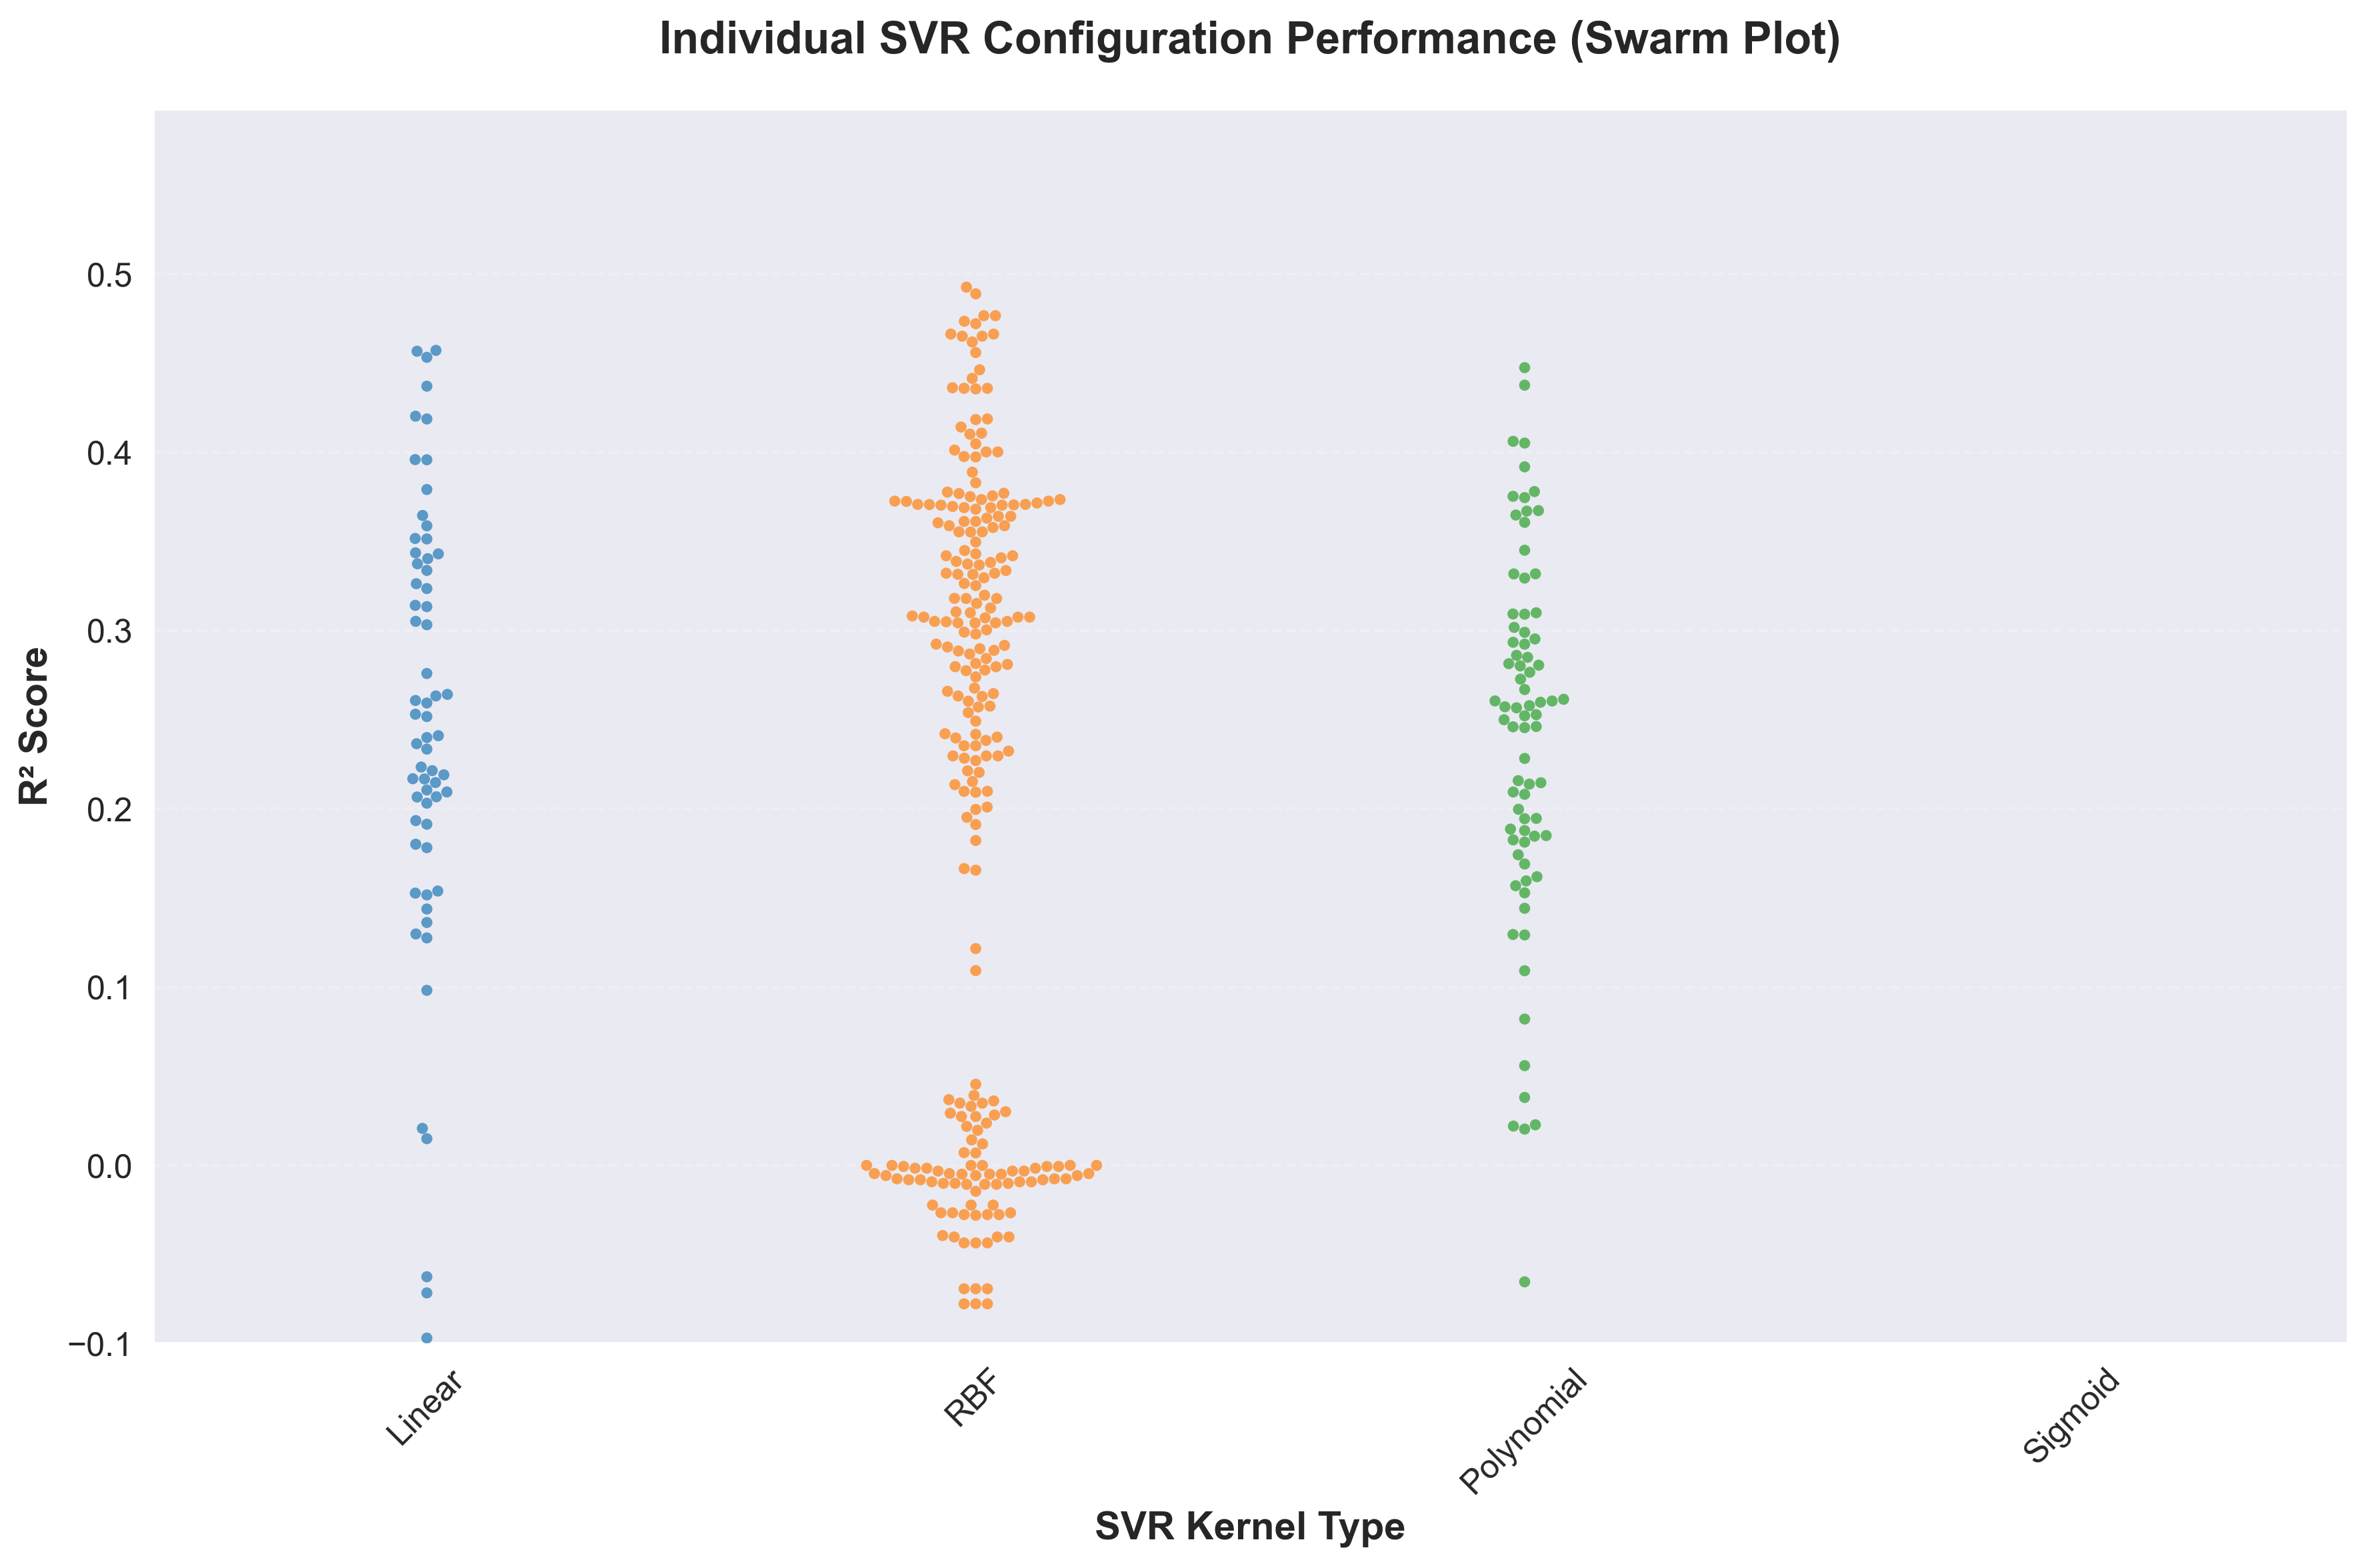

Created swarm plot visualization


'Created swarm plot visualization'

In [65]:
# Create swarm plot for individual configuration visualization
plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams['font.family'] = 'sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# Create swarm plot with proper R² scaling
sns.swarmplot(data=df_benchmark, x='svr_kernel', y='model_performance', 
              order=kernels, palette=kernel_palette, size=4, alpha=0.7)

plt.title('Individual SVR Configuration Performance (Swarm Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SVR Kernel Type', fontsize=14, fontweight='bold')
plt.ylabel('R² Score', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(len(kernels)), 
           labels=[kernel_labels[k] for k in kernels],
           rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set proper R² scale
plt.ylim(-0.1, 
         min(1, df_benchmark['model_performance'].max() + 0.1))

plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.savefig(f"{file_save_path}svr_swarm_plot_{exp_id}.png", dpi=300, bbox_inches='tight')
plt.show()

save_and_print("Created swarm plot visualization", print_report_file, level="info")

In [52]:
# Statistical analysis and significance testing for SVR kernels
save_and_print("## SVR Statistical Analysis and Significance Testing", print_report_file, level="section")

from scipy.stats import ttest_ind

# Perform pairwise kernel comparisons
kernel_comparisons = []
for i, kernel1 in enumerate(kernels):
    for j, kernel2 in enumerate(kernels):
        if i < j:
            kernel1_data = df_benchmark[df_benchmark['svr_kernel'] == kernel1]['model_performance']
            kernel2_data = df_benchmark[df_benchmark['svr_kernel'] == kernel2]['model_performance']
            
            if len(kernel1_data) > 0 and len(kernel2_data) > 0:
                t_stat, p_value = ttest_ind(kernel1_data, kernel2_data, equal_var=False)
                mean_diff = kernel1_data.mean() - kernel2_data.mean()
                
                kernel_comparisons.append({
                    'kernel1': kernel1,
                    'kernel2': kernel2,
                    'kernel1_label': kernel_labels[kernel1],
                    'kernel2_label': kernel_labels[kernel2],
                    'mean_difference': mean_diff,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05
                })

# Create comparison table
comparison_df = pd.DataFrame(kernel_comparisons)
save_and_print("Pairwise SVR Kernel Comparisons (Performance):", print_report_file, level="subsection")
save_and_print(comparison_df.round(4).to_string(index=False), print_report_file, level="info")

## SVR Statistical Analysis and Significance Testing
Pairwise SVR Kernel Comparisons (Performance):
kernel1 kernel2 kernel1_label kernel2_label  mean_difference  t_statistic  p_value  significant
 linear     rbf        Linear           RBF          -0.6807      -8.3272   0.0000         True
 linear    poly        Linear    Polynomial          -0.6805      -8.0640   0.0000         True
 linear sigmoid        Linear       Sigmoid           5.2165      11.1384   0.0000         True
    rbf    poly           RBF    Polynomial           0.0002       0.0065   0.9948        False
    rbf sigmoid           RBF       Sigmoid           5.8972      12.7807   0.0000         True
   poly sigmoid    Polynomial       Sigmoid           5.8970      12.7671   0.0000         True


'kernel1 kernel2 kernel1_label kernel2_label  mean_difference  t_statistic  p_value  significant\n linear     rbf        Linear           RBF          -0.6807      -8.3272   0.0000         True\n linear    poly        Linear    Polynomial          -0.6805      -8.0640   0.0000         True\n linear sigmoid        Linear       Sigmoid           5.2165      11.1384   0.0000         True\n    rbf    poly           RBF    Polynomial           0.0002       0.0065   0.9948        False\n    rbf sigmoid           RBF       Sigmoid           5.8972      12.7807   0.0000         True\n   poly sigmoid    Polynomial       Sigmoid           5.8970      12.7671   0.0000         True'

## SVR Best Configuration Analysis

In [53]:
# Identify best performing SVR configuration for each k-value
save_and_print("## Best Performing SVR Configurations by k-value", print_report_file, level="section")

for k_value in k_values:
    k_data = df_benchmark[df_benchmark['k_value'] == k_value]
    if len(k_data) > 0:
        best_config_row = k_data.loc[k_data['model_performance'].idxmax()]
        best_kernel = best_config_row['svr_kernel']
        best_c = best_config_row['svr_C']
        best_gamma = best_config_row['svr_gamma']
        best_degree = best_config_row['svr_degree']
        best_performance = best_config_row['model_performance']
        
        save_and_print(f"k={k_value}:", print_report_file, level="subsection")
        save_and_print(f"  Best configuration: {kernel_labels[best_kernel]} (C={best_c}, γ={best_gamma}, deg={best_degree})", print_report_file, level="info")
        save_and_print(f"  Best performance (R²): {best_performance:.4f}", print_report_file, level="info")

## Best Performing SVR Configurations by k-value
k=100:
  Best configuration: RBF (C=10.0, γ=gammaScale, deg=3)
  Best performance (R²): 0.4927
k=500:
  Best configuration: RBF (C=10.0, γ=gammaScale, deg=3)
  Best performance (R²): 0.4767


In [54]:
# Generate comprehensive SVR summary report
save_and_print("## SVR Comprehensive Summary", print_report_file, level="section")

# Overall best SVR configuration
overall_best_row = df_benchmark.loc[df_benchmark['model_performance'].idxmax()]
overall_best_kernel = overall_best_row['svr_kernel']
overall_best_c = overall_best_row['svr_C']
overall_best_gamma = overall_best_row['svr_gamma']
overall_best_degree = overall_best_row['svr_degree']
overall_best_performance = overall_best_row['model_performance']
overall_best_k = overall_best_row['k_value']

save_and_print("### Overall Best SVR Configuration", print_report_file, level="subsection")
save_and_print(f"Best overall configuration: {kernel_labels[overall_best_kernel]} (C={overall_best_c}, γ={overall_best_gamma}, deg={overall_best_degree})", print_report_file, level="info")
save_and_print(f"Best overall performance (R²): {overall_best_performance:.4f}", print_report_file, level="info")
save_and_print(f"At k-value: {overall_best_k}", print_report_file, level="info")

# Performance range
performance_range = df_benchmark['model_performance'].max() - df_benchmark['model_performance'].min()
save_and_print(f"Performance range across all SVR configurations: {performance_range:.4f}", print_report_file, level="info")

# Time efficiency analysis
fastest_kernel_time = df_benchmark.groupby('svr_kernel')['model_training_time'].mean().idxmin()
fastest_time = df_benchmark.groupby('svr_kernel')['model_training_time'].mean().min()
save_and_print(f"Fastest training kernel: {kernel_labels[fastest_kernel_time]} ({fastest_time:.3f}s)", print_report_file, level="info")

# Key findings summary
save_and_print("### Key Findings Summary", print_report_file, level="subsection")
save_and_print("1. Kernel type performance ranking (based on mean R²):", print_report_file, level="info")
kernel_ranking = df_benchmark.groupby('svr_kernel')['model_performance'].mean().sort_values(ascending=False)
for i, (kernel, perf) in enumerate(kernel_ranking.items(), 1):
    save_and_print(f"   {i}. {kernel_labels[kernel]}: {perf:.4f}", print_report_file, level="info")

save_and_print("2. Optimal C parameter ranges by kernel:", print_report_file, level="info")
for kernel in kernels:
    kernel_c_data = c_performance_stats[c_performance_stats['svr_kernel'] == kernel]
    if len(kernel_c_data) > 0:
        best_c_idx = kernel_c_data['mean'].idxmax()
        best_c = kernel_c_data.loc[best_c_idx, 'svr_C']
        save_and_print(f"   {kernel_labels[kernel]}: Optimal C ≈ {best_c}", print_report_file, level="info")

save_and_print("3. Feature set size impact:", print_report_file, level="info")
k_impact = df_benchmark.groupby('k_value')['model_performance'].mean()
for k_val, perf in k_impact.items():
    save_and_print(f"   k={k_val}: Mean R² = {perf:.4f}", print_report_file, level="info")

print(f"Print report saved to: {print_report_path}")

## SVR Comprehensive Summary
### Overall Best SVR Configuration
Best overall configuration: RBF (C=10.0, γ=gammaScale, deg=3)
Best overall performance (R²): 0.4927
At k-value: 100
Performance range across all SVR configurations: 12.7427
Fastest training kernel: Polynomial (0.085s)
### Key Findings Summary
1. Kernel type performance ranking (based on mean R²):
   1. RBF: 0.2116
   2. Polynomial: 0.2114
   3. Linear: -0.4691
   4. Sigmoid: -5.6856
2. Optimal C parameter ranges by kernel:
   Linear: Optimal C ≈ 0.1
   RBF: Optimal C ≈ 10.0
   Polynomial: Optimal C ≈ 1.0
   Sigmoid: Optimal C ≈ 1.0
3. Feature set size impact:
   k=100: Mean R² = -0.4197
   k=500: Mean R² = -0.4805
Print report saved to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data/results/ThesisResult5-ModelSelectionBenchmark/v1_svr_hyperparameter_mrmr_d3/svr_hyperparameter_visualisation_report_v1_svr_hyperparameter_mrmr_d3.md


In [55]:
# Generate enhanced summary report with all new visualizations
save_and_print("## Enhanced Visualization Summary", print_report_file, level="section")

save_and_print("### New Enhanced Visualizations Created:", print_report_file, level="subsection")
save_and_print("1. **Multi-dimensional Faceted Plots**: Shows kernel × C × k_value interactions with proper R² scaling", print_report_file, level="info")
save_and_print("2. **Advanced Heatmap Matrix**: C vs k_value across all kernels with proper R² color scaling", print_report_file, level="info")
save_and_print("3. **Configuration Ranking Visualization**: Ranks all SVR configurations by performance with kernel and C parameter visualization", print_report_file, level="info")
save_and_print("4. **Enhanced Statistical Visualizations**: Violin plots and swarm plots for better distribution analysis", print_report_file, level="info")
save_and_print("5. **Improved Small Multiples**: Individual kernel analysis with proper R² range handling", print_report_file, level="info")

save_and_print("### Key Technical Improvements:", print_report_file, level="subsection")
save_and_print("- **Proper R² Scaling**: All visualizations maintain 0-1 range while accommodating negative values", print_report_file, level="info")
save_and_print("- **Consistent Color Mapping**: Kernel types use consistent colors across all plots", print_report_file, level="info")
save_and_print("- **Publication Quality**: High-resolution (300 DPI) images with professional styling", print_report_file, level="info")
save_and_print("- **Multi-dimensional Analysis**: Complex hyperparameter interactions visualized clearly", print_report_file, level="info")

save_and_print("### Files Generated:", print_report_file, level="subsection")
save_and_print(f"- svr_faceted_interactions_{exp_id}.png: Multi-dimensional kernel × C × k_value interactions", print_report_file, level="info")
save_and_print(f"- svr_heatmap_matrix_{exp_id}.png: Advanced heatmap matrix visualization", print_report_file, level="info")
save_and_print(f"- svr_configuration_ranking_{exp_id}.png: Configuration performance ranking", print_report_file, level="info")
save_and_print(f"- svr_violin_plot_{exp_id}.png: Enhanced distribution visualization", print_report_file, level="info")
save_and_print(f"- svr_swarm_plot_{exp_id}.png: Individual configuration visualization", print_report_file, level="info")
save_and_print(f"- svr_hyperparameter_visualisation_report_{exp_id}.md: Comprehensive analysis report", print_report_file, level="info")

print(f"Print report saved to: {print_report_path}")
print("Enhanced SVR hyperparameter benchmarking visualization completed successfully!")

## Enhanced Visualization Summary
### New Enhanced Visualizations Created:
1. **Multi-dimensional Faceted Plots**: Shows kernel × C × k_value interactions with proper R² scaling
2. **Advanced Heatmap Matrix**: C vs k_value across all kernels with proper R² color scaling
3. **Configuration Ranking Visualization**: Ranks all SVR configurations by performance with kernel and C parameter visualization
4. **Enhanced Statistical Visualizations**: Violin plots and swarm plots for better distribution analysis
5. **Improved Small Multiples**: Individual kernel analysis with proper R² range handling
### Key Technical Improvements:
- **Proper R² Scaling**: All visualizations maintain 0-1 range while accommodating negative values
- **Consistent Color Mapping**: Kernel types use consistent colors across all plots
- **Publication Quality**: High-resolution (300 DPI) images with professional styling
- **Multi-dimensional Analysis**: Complex hyperparameter interactions visualized clearly
### Files Gen